In [4]:


import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

import trompy as tp



# the next two lines will expand the printed tables
pd.options.display.max_rows= 40000
pd.options.display.max_columns= 40000


In [133]:
pd.read_excel(r"C:\Users\hta031\Github\FEDPROTEINPRO\METAFILE FEDXC DATA SHEETS.xls" ,sheet_name="METAFILE" )

#pd.read_csv(r"C:\Users\hta031\Github\FEDPROTEINPRO\data\FED004_091022_00.CSV")




,fedfile,mouse,diet,mode,sex,order,epoch
0,FED001_091022_00.CSV,FEDXC01,NR,FF,M,2,E1
1,FED001_091922_00_MERGED.CSV,FEDXC01,PR,FF,M,2,E2
2,FED001_092622_00.CSV,FEDXC01,NR,FF,M,2,E3
3,FED001_100322_00.CSV,FEDXC01,PR,FF,M,2,E4
4,FED002_091022_00.CSV,FEDXC02,NR,FF,M,2,E1
5,FED002_091922_00.CSV,FEDXC02,PR,FF,M,2,E2
6,FED002_092622_00.CSV,FEDXC02,NR,FF,M,2,E3
7,FED002_100322_00.CSV,FEDXC02,PR,FF,M,2,E4
8,FED003_091022_00.CSV,FEDXC03,NR,FF,M,2,E1
9,FED003_091922_00.CSV,FEDXC03,PR,FF,M,2,E2


In [5]:
DATA_FOLDER = "..\\data"
df = pd.read_csv(os.path.join(DATA_FOLDER, "FED001_091022_00.CSV"))

def tweak_fed(df):
    
    return (df
             .rename(columns={"MM:DD:YYYY hh:mm:ss": "t",
                             "InterPelletInterval": "ipi"})
             .assign(t=lambda df_: pd.to_datetime(df_.t))
             .set_index("t")
             .query("Event == 'Pellet'")
              .loc["2022-09-12 08:00:00":] # cuts off training phase
             .loc[:,"ipi"] # could use .loc[:,["ipi", "col2", "col5" etc]] to get mutliple columns, e.g. animal name etc
           )
#tweak_fed(df) # could add animal name from metafile and diet and phase so these are returned in dataframe

In [6]:
# read in metafile and put pellets dataframe in keys of a dict
METAFILE = "..\\METAFILE FEDXC DATA SHEETS.xls"
rows, header = tp.metafilereader(METAFILE, sheetname="METAFILE")

ff_dict = {}
for row in rows:
    # file, mouse, diet, mode, sex,order,epoch = row
    fedfile, mouse, diet, mode, sex,order,epoch = row
    if (mode == "FF") and (diet in ["NR", "PR"]):
        key = "_".join([mouse, epoch])
        ff_dict[key] = {}
        ff_dict[key]["mouse"] = mouse
        ff_dict[key]["diet"] = diet
        ff_dict[key]["sex"] = sex
        ff_dict[key]["epoch"] = epoch
        ff_dict[key]["order"] = int(order)
        ff_dict[key]["pellets"] = tweak_fed(pd.read_csv(os.path.join(DATA_FOLDER, fedfile)))
    


File is excel file. Making csv metafile first


In [7]:
ff_dict["FEDXC02_E1"]["pellets"].head(200)


t
2022-09-12 08:23:22    3163.0
2022-09-12 08:34:39     677.0
2022-09-12 08:34:53      14.0
2022-09-12 08:35:07      14.0
2022-09-12 08:35:19      12.0
2022-09-12 08:37:20     121.0
2022-09-12 08:44:38     438.0
2022-09-12 08:44:52      14.0
2022-09-12 08:45:06      14.0
2022-09-12 09:44:05    3539.0
2022-09-12 09:50:36     391.0
2022-09-12 09:55:56     320.0
2022-09-12 10:01:29     333.0
2022-09-12 10:14:56     806.0
2022-09-12 10:15:08      13.0
2022-09-12 10:16:45      97.0
2022-09-12 10:26:54     609.0
2022-09-12 10:31:10     256.0
2022-09-12 10:47:59    1009.0
2022-09-12 11:59:45    4306.0
2022-09-12 11:59:58      13.0
2022-09-12 12:00:12      14.0
2022-09-12 12:00:25      13.0
2022-09-12 12:00:38      13.0
2022-09-12 12:00:51      13.0
2022-09-12 12:08:38     467.0
2022-09-12 12:10:53     135.0
2022-09-12 13:40:35    5382.0
2022-09-12 13:40:48      13.0
2022-09-12 13:41:01      13.0
2022-09-12 13:41:22      21.0
2022-09-12 14:35:23    3241.0
2022-09-12 14:35:36      13.0
2022-09-

In [8]:
(ff_dict["FEDXC01_E1"]["pellets"]
 .resample("d")
 .count()
)

t
2022-09-12     95
2022-09-13    144
2022-09-14    141
2022-09-15    159
2022-09-16    167
2022-09-17    162
2022-09-18    167
2022-09-19     73
Freq: D, Name: ipi, dtype: int64

In [8]:
mice=[]
for key in ff_dict.keys():
    
    mouse= key.split("_")[0]
    if mouse not in mice:
        mice.append(mouse)

In [9]:
mice

['FEDXC01',
 'FEDXC02',
 'FEDXC03',
 'FEDXC04',
 'FEDXC05',
 'FEDXC06',
 'FEDXC07',
 'FEDXC08',
 'FEDXC09',
 'FEDXC10',
 'FEDXC11',
 'FEDXC12']

In [10]:
ff_dict_all_epochs={}
for mouse in mice:
    ff_dict_all_epochs[mouse]={}
    temp=[]
    for key, val in ff_dict.items():
        if mouse in key:
            temp.append(val["pellets"])
            ff_dict_all_epochs [mouse]["order"]= val["order"]
            
    ff_dict_all_epochs[mouse]["pellets"]=pd.concat(temp)       

In [11]:
ff_dict_all_epochs["FEDXC03"]["pellets"].head(50)

t
2022-09-12 08:26:49     3478.0
2022-09-12 08:30:43      233.0
2022-09-12 08:47:42     1020.0
2022-09-12 08:48:01       19.0
2022-09-12 08:57:07      546.0
2022-09-12 08:57:20       13.0
2022-09-12 09:58:38     3677.0
2022-09-12 10:00:51      134.0
2022-09-12 10:03:33      162.0
2022-09-12 10:04:19       46.0
2022-09-12 10:04:31       12.0
2022-09-12 10:43:46     2355.0
2022-09-12 10:54:13      627.0
2022-09-12 12:08:26     4453.0
2022-09-12 12:08:39       13.0
2022-09-12 12:08:52       13.0
2022-09-12 12:09:10       18.0
2022-09-12 12:09:25       15.0
2022-09-12 12:09:47       22.0
2022-09-12 14:06:58     7031.0
2022-09-12 14:07:10       12.0
2022-09-12 14:09:24      134.0
2022-09-12 17:13:13    11029.0
2022-09-12 17:13:26       13.0
2022-09-12 17:13:47       20.0
2022-09-12 19:08:11     6865.0
2022-09-12 19:08:29       18.0
2022-09-12 19:08:44       15.0
2022-09-12 19:09:03       19.0
2022-09-12 19:09:18       15.0
2022-09-12 19:13:39      261.0
2022-09-12 19:59:08     2729.0
2022-0

In [12]:
# ipis=ff_dict_all_epochs["FEDXC02"]["pellets"]

# individual_meals= []
# ipi_before=[]
# ipi_after=[]
# counter= 1
# for index, ipi in enumerate(ipis[1:]):
#     if ipi> 60:
#         individual_meals.append(counter)
#         ipi_before.append(ipis[index -1])
#         ipi_after.append(ipis[index +1])
#         counter= 1
#     else:
#         counter= counter+1
# individual_meals





ipis=ff_dict_all_epochs["FEDXC04"]["pellets"]

individual_meals= []
ipi_before=[]
ipi_after=[]
counter= 1
ipi_start_meal= ipis[0]
for index, ipi in enumerate(ipis[1:]):
    if ipi> 60:
        individual_meals.append(counter)
        ipi_before.append(ipi_start_meal)
        ipi_after.append(ipis[index +1])
        
        counter= 1
        ipi_start_meal=ipis[index +1]
    else:
        counter= counter+1
individual_meals

[2,
 1,
 3,
 1,
 4,
 1,
 2,
 2,
 1,
 2,
 1,
 4,
 2,
 2,
 1,
 3,
 1,
 3,
 1,
 1,
 1,
 3,
 3,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 3,
 3,
 1,
 1,
 1,
 2,
 3,
 1,
 2,
 3,
 2,
 1,
 1,
 3,
 1,
 2,
 3,
 2,
 2,
 1,
 2,
 3,
 1,
 4,
 1,
 2,
 2,
 3,
 1,
 3,
 1,
 2,
 4,
 2,
 1,
 3,
 5,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 5,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 3,
 1,
 1,
 3,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 4,
 1,
 4,
 1,
 2,
 1,
 3,
 3,
 3,
 1,
 1,
 5,
 4,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 4,
 1,
 1,
 1,
 2,
 1,
 1,
 4,
 1,
 3,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 3,
 1,
 2,
 4,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 4,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 3,
 1,
 1,
 2,
 1,
 1,
 7,
 2,
 1,
 2,
 1,
 3,
 2,
 1,


In [28]:
ipi_before

[5318.0,
 96.0,
 115.0,
 65.0,
 158.0,
 2037.0,
 673.0,
 203.0,
 633.0,
 395.0,
 565.0,
 6965.0,
 453.0,
 8856.0,
 85.0,
 8295.0,
 168.0,
 4479.0,
 122.0,
 2158.0,
 64.0,
 96.0,
 1467.0,
 81.0,
 388.0,
 533.0,
 332.0,
 193.0,
 148.0,
 324.0,
 116.0,
 96.0,
 162.0,
 528.0,
 205.0,
 307.0,
 230.0,
 355.0,
 203.0,
 313.0,
 155.0,
 161.0,
 375.0,
 249.0,
 100.0,
 67.0,
 193.0,
 355.0,
 233.0,
 583.0,
 108.0,
 186.0,
 461.0,
 298.0,
 86.0,
 364.0,
 83.0,
 327.0,
 362.0,
 69.0,
 419.0,
 270.0,
 242.0,
 1954.0,
 770.0,
 1035.0,
 263.0,
 327.0,
 293.0,
 110.0,
 282.0,
 180.0,
 94.0,
 269.0,
 381.0,
 317.0,
 135.0,
 686.0,
 427.0,
 99.0,
 458.0,
 97.0,
 186.0,
 515.0,
 97.0,
 279.0,
 111.0,
 135.0,
 343.0,
 230.0,
 316.0,
 165.0,
 92.0,
 295.0,
 265.0,
 121.0,
 621.0,
 101.0,
 95.0,
 874.0,
 194.0,
 487.0,
 79.0,
 2010.0,
 1528.0,
 409.0,
 106.0,
 2442.0,
 112.0,
 305.0,
 499.0,
 601.0,
 222.0,
 455.0,
 342.0,
 83.0,
 480.0,
 195.0,
 448.0,
 157.0,
 68.0,
 120.0,
 113.0,
 269.0,
 150.0,
 397.0,

In [21]:
ff_dict_all_epochs["FEDXC02"]["pellets"].head(10)

t
2022-09-12 08:23:22    3163.0
2022-09-12 08:34:39     677.0
2022-09-12 08:34:53      14.0
2022-09-12 08:35:07      14.0
2022-09-12 08:35:19      12.0
2022-09-12 08:37:20     121.0
2022-09-12 08:44:38     438.0
2022-09-12 08:44:52      14.0
2022-09-12 08:45:06      14.0
2022-09-12 09:44:05    3539.0
Name: ipi, dtype: float64

In [71]:
## gets bodyweights and adds to dictionary
metafile = "..\\METAFILE FEDXC DATA SHEETS.xls"
rows, header = tp.metafilereader(metafile, sheetname="METAFILE_BW")

n_days = len(rows[0])

for row in rows:
    mouse_id = row[0]
    mice[mouse_id]["bodyweight"] = [row[i] for i in range(1, n_days)]

File is excel file. Making csv metafile first


TypeError: list indices must be integers or slices, not str

<AxesSubplot:>

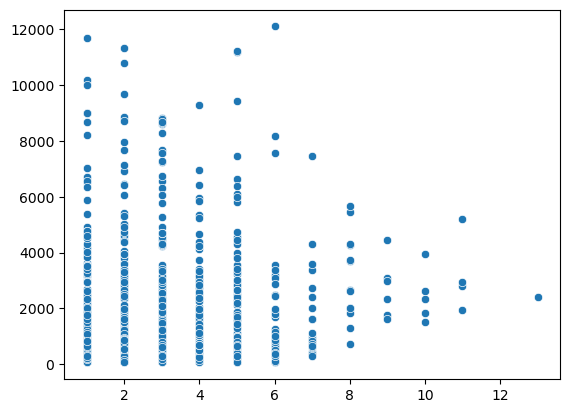

In [31]:
# sns.kdeplot(individual_meals,)
# sns.kdeplot??


# sns.distplot(individual_meals)
sns.scatterplot(x=individual_meals, y= ipi_before)


<AxesSubplot:>

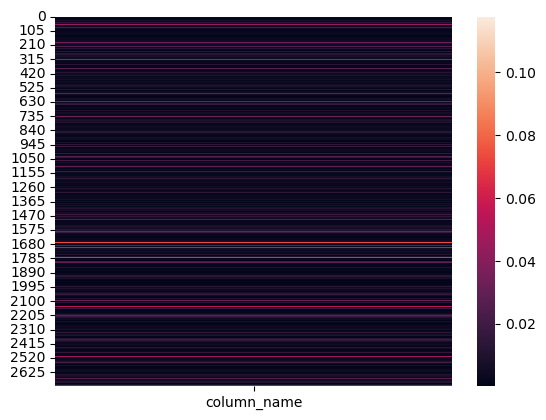

In [68]:
# string_list = [str(element) for element in individual_meals]
# string_list 
df_individual_meals= pd.DataFrame(individual_meals,columns= ["column_name"])
df_ipi_before= pd.DataFrame(ipi_before,columns= ["column_name"])
df_ipi_after=  pd.DataFrame(ipi_after,columns= ["column_name"])
sns.heatmap(df_individual_meals/df_ipi_after)
#sns.heatmap(df_individual_meals/df_ipi_before)

<AxesSubplot:>

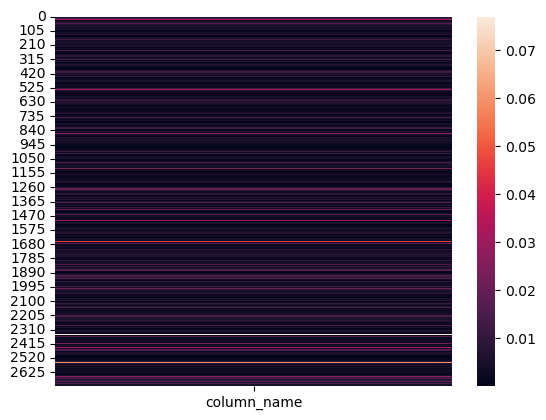

In [65]:
sns.heatmap(df_individual_meals/df_ipi_before)

<AxesSubplot:>

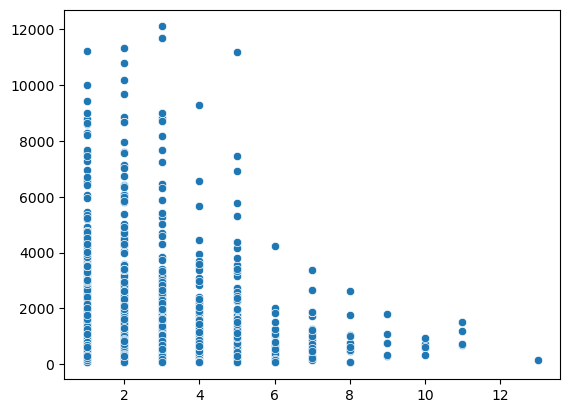

In [16]:
sns.scatterplot(x=individual_meals, y= ipi_after)


In [25]:
ff_dict_all_epochs["FEDXC01"]["pellets"]

#I chnage the offset from 9H to 8H since the code was working in a weird manner and reading date from a day before the experiment begins!

def pellets_by_day(df,maxdays=30):
    return (df
            .rename(index="n_pellets")
            .resample("d", offset = "8H")
            .count()
            .head(maxdays)#We need to add the final two rows instead of deleting last row 
            #.reset_index()
            
           )
pellets_by_day(ff_dict_all_epochs["FEDXC01"]["pellets"])


#The original code by Jaime
# NR=[]
# PR=[]
# for key, val in ff_dict_all_epochs.items():
#     if val["order"] == 1:
#         NR.append(pellets_by_day(val["pellets"]))
#     elif val["order"] == 2:
#         PR.append(pellets_by_day(val["pellets"]))



# NR= pd.concat(NR, axis=1)
# PR= pd.concat(PR, axis=1)



#The code we developed in the second edition
ctl=[]
exp=[]
for key, val in ff_dict_all_epochs.items():
    if val["order"] == 1:
        ctl.append(pellets_by_day(val["pellets"]))
    elif val["order"] == 2:
        exp.append(pellets_by_day(val["pellets"]))

        
# this line will take the mean value of a column to be replaced with NAn or 0, "meanvalue" should be placed
#in .fillna(meanvalue)
#meanvalue = exp_pellets["n_pellets"].mean()
        
        

def clean_df(lst):
    return (pd.concat(lst, axis= 1)
           .fillna(0)
            .reset_index()
            .iloc[:,1:]
           .head(21)) #23 days used because in epoch 4 we used expired pellets for ctl animals

    
  
#Removing the first two rows of the data, since it represents the training days

ctl_pellets= clean_df(ctl)
exp_pellets= clean_df(exp)
#We need to add the final two rows instead of deleting last row
#why one of the animals is starting a day later the others??




In [14]:
ff_dict_all_epochs["FEDXC01"]["pellets"]

t
2022-09-12 09:42:52    14681.0
2022-09-12 09:43:05       13.0
2022-09-12 09:46:28      203.0
2022-09-12 09:54:14      466.0
2022-09-12 10:01:55      461.0
2022-09-12 10:02:12       17.0
2022-09-12 10:02:26       14.0
2022-09-12 10:18:36      970.0
2022-09-12 10:23:01      265.0
2022-09-12 10:23:22       21.0
2022-09-12 10:34:16      654.0
2022-09-12 10:43:37      561.0
2022-09-12 10:53:54      617.0
2022-09-12 12:33:24     5970.0
2022-09-12 12:33:43       19.0
2022-09-12 12:34:52       69.0
2022-09-12 12:38:52      240.0
2022-09-12 12:39:07       15.0
2022-09-12 12:51:24      737.0
2022-09-12 12:51:38       14.0
2022-09-12 12:51:53       15.0
2022-09-12 15:04:35     7962.0
2022-09-12 15:04:49       14.0
2022-09-12 15:05:02       13.0
2022-09-12 16:53:05     6483.0
2022-09-12 16:53:19       13.0
2022-09-12 16:53:31       13.0
2022-09-12 16:53:50       19.0
2022-09-12 16:54:05       15.0
2022-09-12 18:24:17     5412.0
2022-09-12 18:24:36       19.0
2022-09-12 18:24:50       14.0
2022-0

In [105]:
exp_pellets

,n_pellets,n_pellets,n_pellets,n_pellets,n_pellets,n_pellets
0,150,188,151.0,226,180,190
1,157,192,170.0,196,165,167
2,143,184,176.0,229,125,162
3,166,185,157.0,196,165,179
4,157,191,171.0,203,213,172
5,163,184,172.0,198,205,157
6,170,178,170.0,193,198,164
7,135,165,156.0,156,179,137
8,132,160,169.0,166,200,145
9,136,160,168.0,189,231,153


In [27]:
#prints pellet intake excluding the first 2 days of training and epoch 4
ctl_pellets

,n_pellets,n_pellets,n_pellets,n_pellets,n_pellets,n_pellets
0,201,172,169,194,173,192
1,173,169,176,183,179,184
2,183,188,195,191,184,201
3,190,195,187,202,213,197
4,161,187,172,192,193,207
5,182,191,178,203,181,220
6,165,188,176,173,170,179
7,187,177,182,182,187,187
8,179,173,184,211,178,191
9,161,193,182,206,192,190


In [127]:

# NR.to_csv(r"C:\Users\hta031\Github\FEDPROTEINPRO\STATS_FEDPROTEINPRO\NRresult.csv")

# PR.to_csv(r"C:\Users\hta031\Github\FEDPROTEINPRO\STATS_FEDPROTEINPRO\PRresult.csv")



In [128]:
# NR.mean(axis=1)
# PR.mean(axis=1)

# f, ax = plt.subplots()
# ax.plot(NR.mean(axis=1),) #yerror= NR.sem(axis=1))
# ax.plot(PR.mean(axis=1))

In [97]:
ctl_color= "black"
exp_color="magenta"

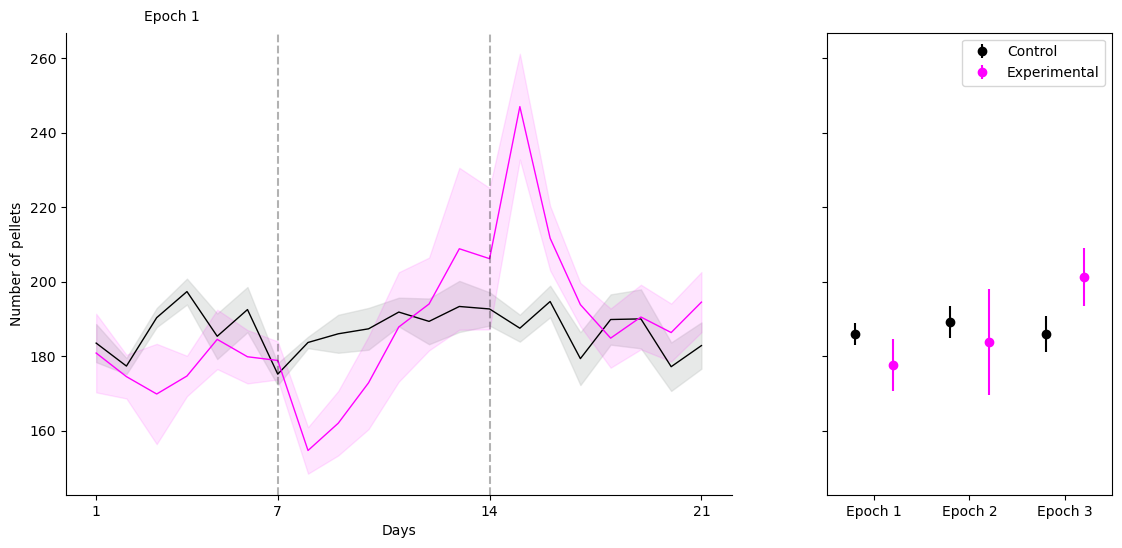

In [104]:

f, [ax1,ax2] = plt.subplots(figsize=(13.5,6), ncols=2,
                            sharey=True,
                           gridspec_kw={"width_ratios":[0.7,0.3]})
tp.shadedError(ax1,ctl_pellets.T,linecolor=ctl_color)
tp.shadedError(ax1,exp_pellets.T,linecolor=exp_color, errorcolor= exp_color, alpha= 0.1)
# ax.plot(ctl_pellets.mean(axis=1),color="black") #yerror= NR.sem(axis=1))
# ax.plot(exp_pellets.mean(axis=1), color= "gold")
ax1.set_ylabel("Number of pellets")
ax1.set_xlabel("Days")
ax1.axvline(6,color="k",linestyle="--", alpha= 0.3)
ax1.axvline(13,color="k",linestyle="--", alpha= 0.3)

#trying to get correct xticks for each epoch
# labels = [item.get_text() for item in ax1.get_xticklabels()]
# labels[0] = "Epoch 1"
# labels[2] = "Epoch 2"
# labels[3] = "Epoch 3"

#trying to remove unwanted ticks
# xticks = ax.xaxis.get_major_ticks()
# xticks[1].set_visible(False)
# xticks[4].set_visible(False)
# xticks[5].set_visible(False)

# ax.set_xticklabels(labels)

# plt.show()

ax1.set_xticks([0,6,13,20],labels=["1","7","14","21"])
ax1.text(2.5,270,"Epoch 1", ha="center")

ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
# f, ax = plt.subplots(figsize=(12,6) )
# ctl_pellets.mean(axis=1).plot(yerr= ctl_pellets.sem(axis=1), ax=ax)
# exp_pellets.mean(axis=1).plot(yerr= exp_pellets.sem(axis=1), ax=ax)

# from matplotlib import ticker

# ticker.IndexLocator(  offset=7)
# ticker.MaxNLocator(3)
#ax.set_xticks([0,1,2])





ctl_E1=ctl_pellets.iloc[0:7,:].mean(axis=0)
ctl_E2=ctl_pellets.iloc[7:14,:].mean(axis=0)
ctl_E3=ctl_pellets.iloc[14:,:].mean(axis=0)

exp_E1=exp_pellets.iloc[0:7,:].mean(axis=0)
exp_E2=exp_pellets.iloc[7:14,:].mean(axis=0)
exp_E3=exp_pellets.iloc[14:,:].mean(axis=0)

spacing=0.2
ax2.errorbar([1-spacing,2-spacing,3-spacing],[ctl_E1.mean(), ctl_E2.mean(), ctl_E3.mean()],
             yerr=[ctl_E1.sem(), ctl_E2.sem(), ctl_E3.sem()],
            marker="o",
            linestyle="",
            color=ctl_color,
             label="Control")

ax2.errorbar([1+spacing,2+spacing,3+spacing],[exp_E1.mean(), exp_E2.mean(), exp_E3.mean()],
             yerr=[exp_E1.sem(), exp_E2.sem(), exp_E3.sem()],
            marker="o",
            linestyle="",
            color=exp_color,
            label="Experimental")

ax2.set_xticks([1,2,3],labels=["Epoch 1", "Epoch 2", "Epoch 3"])
ax2.set_xlim([0.5,3.5])

ax2.legend()


In [112]:
ax1.fill_between??

Signature:
ax1.fill_between(
    x,
    y1,
    y2=0,
    where=None,
    interpolate=False,
    step=None,
    *,
    data=None,
    **kwargs,
)
Docstring:
Fill the area between two horizontal curves.

The curves are defined by the points (*x*, *y1*) and (*x*,
*y2*).  This creates one or multiple polygons describing the filled
area.

You may exclude some horizontal sections from filling using *where*.

By default, the edges connect the given points directly.  Use *step*
if the filling should be a step function, i.e. constant in between
*x*.

Parameters
----------
x : array (length N)
    The x coordinates of the nodes defining the curves.

y1 : array (length N) or scalar
    The y coordinates of the nodes defining the first curve.

y2 : array (length N) or scalar, default: 0
    The y coordinates of the nodes defining the second curve.

where : array of bool (length N), optional
    Define *where* to exclude some horizontal regions from being filled.
    The filled regions are defined

In [77]:
ctl_E2

n_pellets    182.714286
n_pellets    177.571429
n_pellets    185.857143
n_pellets    205.857143
n_pellets    186.000000
n_pellets    197.000000
dtype: float64

In [72]:
ctl_pellets

,n_pellets,n_pellets,n_pellets,n_pellets,n_pellets,n_pellets
0,201,172,169,194,173,192
1,173,169,176,183,179,184
2,183,188,195,191,184,201
3,190,195,187,202,213,197
4,161,187,172,192,193,207
5,182,191,178,203,181,220
6,165,188,176,173,170,179
7,187,177,182,182,187,187
8,179,173,184,211,178,191
9,161,193,182,206,192,190


In [73]:
(201+173+183+190+161+182+165)/7

179.28571428571428

C:\Users\admin\AppData\Local\Temp\ipykernel_19808\3930830357.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


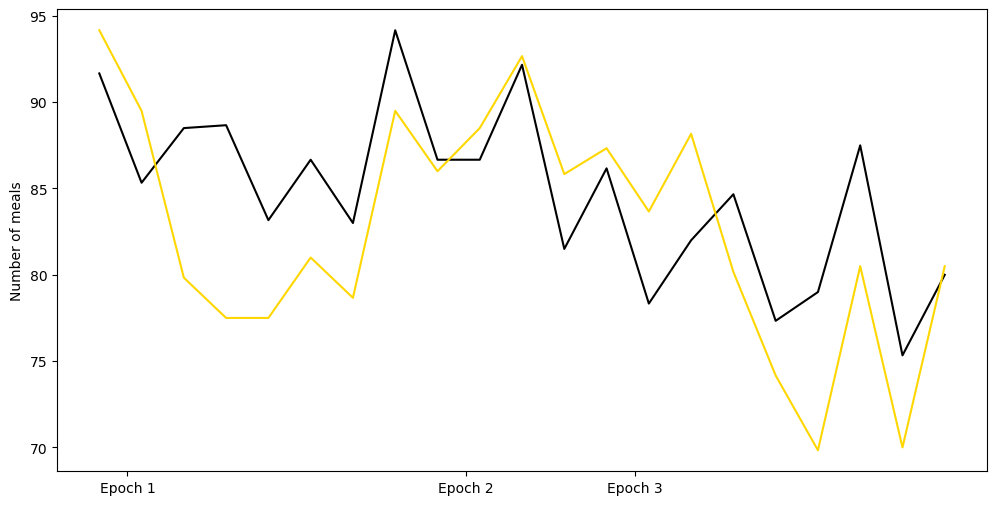

<AxesSubplot:xlabel='t'>

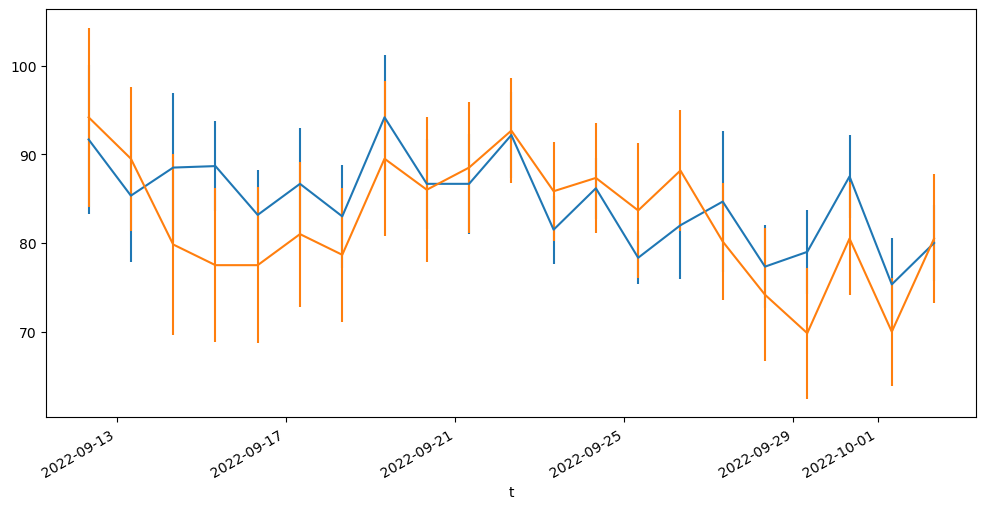

In [147]:
# ff_dict_all_epochs["FEDXC01"]["pellets"]

# # def calculate_meals(df):
# #     return (df
            
        
# def nmeals_by_day(df):
#     return (df
#             .resample("d", offset = "10H")
#             .apply(lambda df_: sum(df_ > 60))
#             .reset_index()
            
#            )
# nmeals_by_day (ff_dict_all_epochs["FEDXC01"]["pellets"])


# def mealsize_by_day(df):
#     return (df
#             .resample("d", offset = "10H")
#             .apply(lambda df_: df_.count()/sum(df_ > 60))
#             .reset_index()
            
#            )
# mealsize_by_day (ff_dict_all_epochs["FEDXC01"]["pellets"])

# ff_dict_all_epochs["FEDXC01"]["pellets"]

# def calculate_meals(df):
#     return (df

###########################################NEW VERSION OF THE CODE#########################

            
        
def nmeals_by_day(df):
    return (df
             .rename(index="n_meals")
            .resample("d", offset = "8H")
            .apply(lambda df_: sum(df_ > 60))
            # .reset_index()
            
           )

ctl=[]
exp=[]
for key, val in ff_dict_all_epochs.items():
    if val["order"] == 1:
        ctl.append(nmeals_by_day(val["pellets"]))
    elif val["order"] == 2:
        exp.append(nmeals_by_day(val["pellets"]))

ctl_n_meals= clean_df(ctl).iloc[2:]

exp_n_meals= clean_df(exp).iloc[2:]





f, ax = plt.subplots(figsize=(12,6) )
ax.plot(ctl_n_meals.mean(axis=1),color="black") #yerror= NR.sem(axis=1))
ax.plot(exp_n_meals.mean(axis=1), color= "gold")
ax.set_ylabel("Number of meals")
# ax.set_xlabel("Days")

#trying to get correct xticks for each epoch
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = "Epoch 1"
labels[2] = "Epoch 2"
labels[3] = "Epoch 3"

#trying to remove unwanted ticks
xticks = ax.xaxis.get_major_ticks()
xticks[1].set_visible(False)
xticks[4].set_visible(False)
xticks[5].set_visible(False)

ax.set_xticklabels(labels)

plt.show()




f, ax = plt.subplots(figsize=(12,6))
ctl_n_meals.mean(axis=1).plot(yerr= ctl_n_meals.sem(axis=1), ax=ax)
exp_n_meals.mean(axis=1).plot(yerr= exp_n_meals.sem(axis=1), ax=ax)


In [139]:
# ff_dict_all_epochs["FEDXC01"]["pellets"]

# def pellets_by_day(df):
#     return (df
#             .between_time("9:0", "7:0")
#             .resample("d", offset = "9H")
#             .count()
#             #.reset_index()
            
#            )

# pellets_by_day(ff_dict_all_epochs["FEDXC01"]["pellets"])

# NR=[]
# PR=[]
# for key, val in ff_dict_all_epochs.items():
#     if val["order"] == 1:
#         NR.append(pellets_by_day(val["pellets"]))
#     elif val["order"] == 2:
#         PR.append(pellets_by_day(val["pellets"]))
    
    


# NR= pd.concat(NR, axis=1)
# PR= pd.concat(PR, axis=1)


# f, ax = plt.subplots()
# NR.mean(axis=1).plot(yerr= NR.sem(axis=1), ax=ax)
# PR.mean(axis=1).plot(yerr= PR.sem(axis=1), ax=ax)
# #ax.set_xticks([0,1,2])

C:\Users\hta031\AppData\Local\Temp\ipykernel_30464\2683778822.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


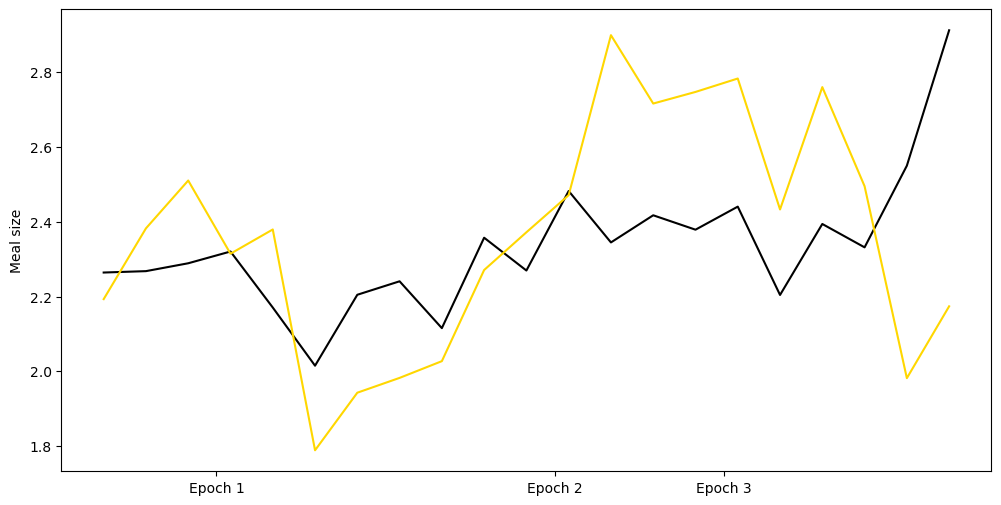

<AxesSubplot:xlabel='t'>

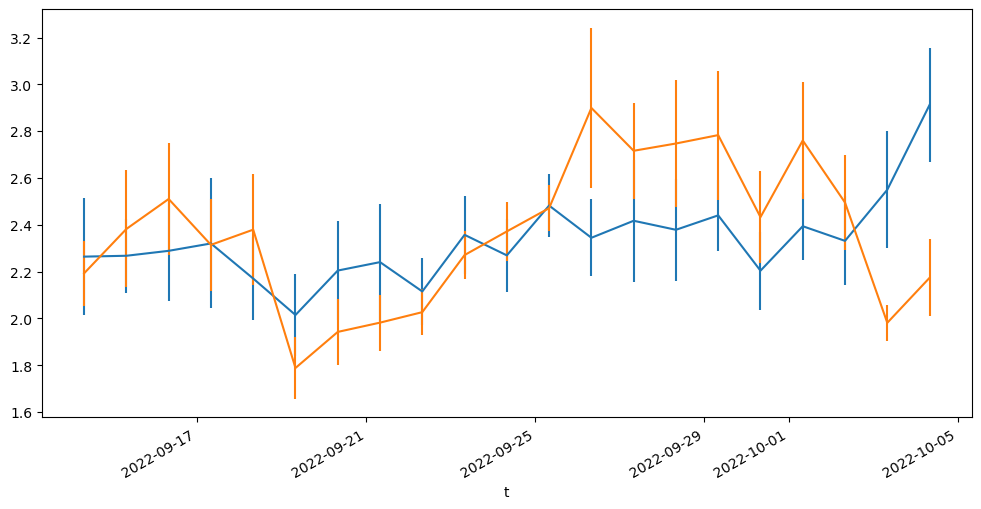

In [20]:
def mealsize_by_day(df):
    return (df
            .rename(index="mealsize")
            .resample("d", offset = "8H")
            .apply(lambda df_: df_.count()/sum(df_ > 60))
            
#              .reset_index()
            
           )
#mealsize_by_day (ff_dict_all_epochs["FEDXC01"]["pellets"])


ctl=[]
exp=[]
for key, val in ff_dict_all_epochs.items():
    if val["order"] == 1:
        ctl.append(mealsize_by_day(val["pellets"]))
    elif val["order"] == 2:
        exp.append(mealsize_by_day(val["pellets"]))

ctl_meal_size= clean_df(ctl).iloc[2:]

exp_meal_size= clean_df(exp).iloc[2:]


f, ax = plt.subplots(figsize=(12,6) )
ax.plot(ctl_meal_size.mean(axis=1),color="black") #yerror= NR.sem(axis=1))
ax.plot(exp_meal_size.mean(axis=1), color= "gold")
ax.set_ylabel("Meal size")
# ax.set_xlabel("Days")

#trying to get correct xticks for each epoch
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = "Epoch 1"
labels[2] = "Epoch 2"
labels[3] = "Epoch 3"

#trying to remove unwanted ticks
xticks = ax.xaxis.get_major_ticks()
xticks[1].set_visible(False)
xticks[4].set_visible(False)
xticks[5].set_visible(False)

ax.set_xticklabels(labels)

plt.show()


f, ax = plt.subplots(figsize=(12,6))
ctl_meal_size.mean(axis=1).plot(yerr= ctl_meal_size.sem(axis=1), ax=ax)
exp_meal_size.mean(axis=1).plot(yerr= exp_meal_size.sem(axis=1), ax=ax)

In [130]:
def make_ff_df(df, mouse, diet,order, epoch):
    """
    Takes df of pellets - time and IPIs - and returns row for collated df
    """
    out = pd.DataFrame.from_dict({"mouse": [mouse],
                                  "diet": [diet],
                                  "order" : [int(order)],
                                  "epoch" : [epoch],
                                   
                                  "n_pellets": [len(df)],
                                  "n_meals": (df > 60).sum(),
                                  "session_time": (df.index[-1] - df.index[0]).total_seconds() / 60,
                                  "short_ipis": (df < 5).sum()
                                  })

    return (out
           .assign(meal_freq=lambda df_: 1 / (df_.session_time / df_.n_meals) * 60 * 24,
                   meal_size=lambda df_: df_.n_pellets / df_.n_meals,
                   )
           .astype({"diet": "category",
                    "n_pellets": "uint16",
                    "n_meals": "uint16"}))

ff = pd.DataFrame()

for key, val in ff_dict.items():
    
    pellets = val ["pellets"]
    mouse = val["mouse"]
    diet = val["diet"]
    order = val ["order"]
    epoch = val ["epoch"]
    ff = pd.concat([ff, make_ff_df(pellets, mouse, diet,order, epoch)])
    
ff.reset_index(drop=True, inplace=True);

 #ff_dict[key]["order"] = int(order)

    
##############NEED TO EXCLUDE THE DATA OF THE FIRST 2 DAYS FROM FF#############   



# ctlall=[]
# expall=[]
# for key, val in ff_dict.items():
#     if val["order"] == 1:
#         ctlall.append(pellets_by_day(val["pellets"]))
#     elif val["order"] == 2:
#         expall.append(pellets_by_day(val["pellets"]))

# ctlall_pellets= clean_df(ctlall).iloc[2:]

# expall_pellets= clean_df(expall).iloc[2:]



In [132]:
df


,MM:DD:YYYY hh:mm:ss,Library_Version,Session_type,Device_Number,Battery_Voltage,Motor_Turns,FR,Event,Active_Poke,Left_Poke_Count,Right_Poke_Count,Pellet_Count,Block_Pellet_Count,Retrieval_Time,InterPelletInterval,Poke_Time
0,9/10/2022 8:41:29,1.16.3,Free_feed,1,3.94,NaN,0,LeftWithPellet,Left,1,0,0,0,NaN,NaN,0.00
1,9/10/2022 8:42:49,1.16.3,Free_feed,1,3.95,NaN,0,LeftWithPellet,Left,2,0,0,0,NaN,NaN,0.56
2,9/10/2022 8:43:28,1.16.3,Free_feed,1,3.94,NaN,0,LeftWithPellet,Left,3,0,0,0,NaN,NaN,0.27
3,9/10/2022 8:45:17,1.16.3,Free_feed,1,3.94,NaN,0,RightWithPellet,Left,3,1,0,0,NaN,NaN,0.55
4,9/10/2022 8:46:09,1.16.3,Free_feed,1,3.94,NaN,0,LeftWithPellet,Left,4,1,0,0,NaN,NaN,0.32
5,9/10/2022 8:46:42,1.16.3,Free_feed,1,3.94,NaN,0,LeftWithPellet,Left,5,1,0,0,NaN,NaN,0.02
6,9/10/2022 8:47:20,1.16.3,Free_feed,1,3.94,NaN,0,LeftWithPellet,Left,6,1,0,0,NaN,NaN,0.16
7,9/10/2022 8:47:23,1.16.3,Free_feed,1,3.94,NaN,0,LeftWithPellet,Left,7,1,0,0,NaN,NaN,0.40
8,9/10/2022 8:47:26,1.16.3,Free_feed,1,3.94,NaN,0,LeftWithPellet,Left,8,1,0,0,NaN,NaN,0.69
9,9/10/2022 8:47:36,1.16.3,Free_feed,1,3.94,NaN,0,LeftWithPellet,Left,9,1,0,0,NaN,NaN,0.01


In [14]:
ff.to_csv(r"C:\Users\hta031\Github\FEDPROTEINPRO\STATS_FEDPROTEINPRO\\ff.csv")

In [179]:
# resultallpellets = pd.concat(frames)
# resultallpellets
# resultallpellets["Mouse"] = resultallpellets.index
# ff.to_csv(r"C:\Users\hta031\Github\FEDPROTEINPRO\STATS_FEDPROTEINPRO\\ff.csv")


# ff

,mouse,diet,order,epoch,n_pellets,n_meals,session_time,short_ipis,meal_freq,meal_size
0,FEDXC01,NR,2,E1,1479,545,12947.350000,0,60.614720,2.713761
1,FEDXC01,PR,2,E2,1083,469,10074.316667,0,67.037797,2.309168
2,FEDXC01,NR,2,E3,1279,364,10076.800000,0,52.016513,3.513736
3,FEDXC01,PR,2,E4,1051,472,10004.750000,0,67.935731,2.226695
4,FEDXC02,NR,2,E1,1799,824,12927.316667,0,91.787030,2.183252
5,FEDXC02,PR,2,E2,1227,659,10066.550000,0,94.268642,1.861912
6,FEDXC02,NR,2,E3,1333,556,10075.400000,0,79.464835,2.397482
7,FEDXC02,PR,2,E4,1261,689,10013.383333,0,99.083393,1.830189
8,FEDXC03,NR,2,E1,1566,833,12935.433333,0,92.731335,1.879952
9,FEDXC03,PR,2,E2,1233,626,10042.650000,0,89.761169,1.969649


C:\ProgramData\Anaconda3\lib\site-packages\trompy\barscatter.py:304: UserWarning: linewuidth is not a functional keyword argument. Check spelling or barscatter version.
  warnings.warn("{} is not a functional keyword argument. Check spelling or barscatter version.".format(key))


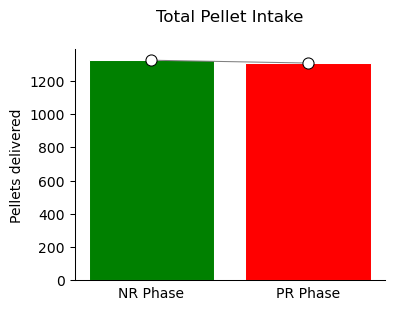

In [125]:
#plots all the pellets taken in PR and NR phases (combined) of Experimental group.
#DATA4LIST = data ["Time spent sitting still"].tolist()



EXP_Pellets = ff.loc[ff["order"] == 2]
EXP_Pellets

EXP_Pellets_PR = EXP_Pellets.loc[EXP_Pellets["diet"] == "PR", ["n_pellets"]].mean()
DATA1 = EXP_Pellets_PR.tolist()


EXP_Pellets_NR= EXP_Pellets.loc[EXP_Pellets["diet"] == "NR", ["n_pellets"]].mean()
DATA2 = EXP_Pellets_NR.tolist()

EXP_Pellets_NR
EXP_Pellets_PR


# def Average (lst):
#     return sum(lst)/len(lst)


f, ax = plt.subplots(figsize= (4, 3))
_, _, barlist, _ = tp.barscatter([DATA2,DATA1], ax=ax, paired=True,linewuidth =1, groupwidth = 0.70,
barfacecolor_option="individual", baredgecolor= ["white"]*8, barfacecolor=["green", "red"],
barlabels = ["NR Phase", "PR Phase"] )

ax.set_title("Total Pellet Intake", pad= 20)
ax.set_ylabel("Pellets delivered",fontsize = 10)

figfolder = r"C:\Users\hta031\OneDrive - UiT Office 365\Documents\People\Hamid\Presentations\2023\08_August\EBBS\EBBS_FIGS\\"
f.savefig(figfolder + "TOTAL_INTAKE_EXP.pdf")


C:\ProgramData\Anaconda3\lib\site-packages\trompy\barscatter.py:304: UserWarning: linewuidth is not a functional keyword argument. Check spelling or barscatter version.
  warnings.warn("{} is not a functional keyword argument. Check spelling or barscatter version.".format(key))


Text(0, 0.5, 'Number of meals')

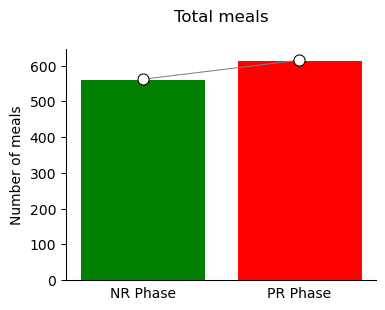

In [126]:
EXP_meal = ff.loc[ff["order"] == 2]
EXP_Pellets

EXP_meal_PR = EXP_Pellets.loc[EXP_Pellets["diet"] == "PR", ["n_meals"]].mean()


EXP_meal_NR= EXP_Pellets.loc[EXP_Pellets["diet"] == "NR", ["n_meals"]].mean()




# def Average (lst):
#     return sum(lst)/len(lst)


f, ax = plt.subplots(figsize= (4, 3))
_, _, barlist, _ = tp.barscatter([EXP_meal_NR,EXP_meal_PR], ax=ax, paired=True,linewuidth =1, groupwidth = 0.70,
barfacecolor_option="individual", baredgecolor= ["white"]*8, barfacecolor=["green", "red"],
barlabels = ["NR Phase", "PR Phase"] )

ax.set_title("Total meals", pad= 20)
ax.set_ylabel("Number of meals",fontsize = 10)

In [128]:
EXP_Pellets

,mouse,diet,order,epoch,n_pellets,n_meals,session_time,short_ipis,meal_freq,meal_size
0,FEDXC01,NR,2,E1,1108,381,10021.750000,0,54.744930,2.908136
1,FEDXC01,PR,2,E2,1083,469,10074.316667,0,67.037797,2.309168
2,FEDXC01,NR,2,E3,1279,364,10076.800000,0,52.016513,3.513736
3,FEDXC01,PR,2,E4,1051,472,10004.750000,0,67.935731,2.226695
4,FEDXC02,NR,2,E1,1303,602,10085.816667,0,85.950402,2.164452
5,FEDXC02,PR,2,E2,1227,659,10066.550000,0,94.268642,1.861912
6,FEDXC02,NR,2,E3,1333,556,10075.400000,0,79.464835,2.397482
7,FEDXC02,PR,2,E4,1261,689,10013.383333,0,99.083393,1.830189
8,FEDXC03,NR,2,E1,1172,640,10091.833333,0,91.321365,1.831250
9,FEDXC03,PR,2,E2,1233,626,10042.650000,0,89.761169,1.969649


In [122]:
EXP_meal = ff.loc[ff["order"] == 2]


EXP_mealfreq_PR = EXP_Pellets.loc[EXP_Pellets["diet"] == "PR", ["meal_freq"]].mean()


EXP_mealfreq_NR= EXP_Pellets.loc[EXP_Pellets["diet"] == "NR", ["meal_freq"]].mean()




# def Average (lst):
#     return sum(lst)/len(lst)


f, ax = plt.subplots(figsize= (4, 3))
_, _, barlist, _ = tp.barscatter([EXP_mealfreq_NR,EXP_mealfreq_PR], ax=ax, paired=True,linewuidth =1, groupwidth = 0.70,
barfacecolor_option="individual", baredgecolor= ["white"]*8, barfacecolor=["green", "red"],
barlabels = ["NR Phase", "PR Phase"] )

ax.set_title("Meal frequency", pad= 20)
ax.set_ylabel("Number of meals/day",fontsize = 10)

NameError: name 'EXP_Pellets' is not defined

C:\Users\hta031\AppData\Roaming\Python\Python39\site-packages\trompy\barscatter.py:304: UserWarning: linewuidth is not a functional keyword argument. Check spelling or barscatter version.
  warnings.warn("{} is not a functional keyword argument. Check spelling or barscatter version.".format(key))


Text(0, 0.5, 'Number of pellets/meal')

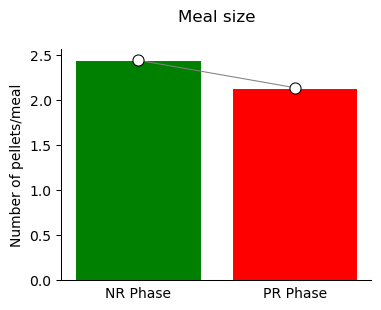

In [28]:
EXP_meal = ff.loc[ff["order"] == 2]


EXP_mealsize_PR = EXP_Pellets.loc[EXP_Pellets["diet"] == "PR", ["meal_size"]].mean()


EXP_mealsize_NR= EXP_Pellets.loc[EXP_Pellets["diet"] == "NR", ["meal_size"]].mean()




# def Average (lst):
#     return sum(lst)/len(lst)


f, ax = plt.subplots(figsize= (4, 3))
_, _, barlist, _ = tp.barscatter([EXP_mealsize_NR,EXP_mealsize_PR], ax=ax, paired=True,linewuidth =1, groupwidth = 0.70,
barfacecolor_option="individual", baredgecolor= ["white"]*8, barfacecolor=["green", "red"],
barlabels = ["NR Phase", "PR Phase"] )

ax.set_title("Meal size", pad= 20)
ax.set_ylabel("Number of pellets/meal",fontsize = 10)

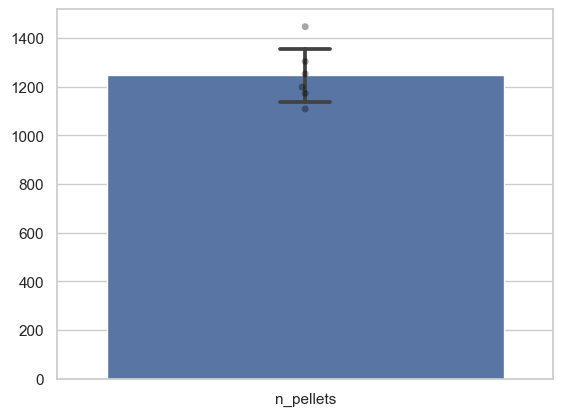

In [29]:
#this cell plots total pellet intake of only Protein restricted mice in 4 epochs NR, PR,NR,PR


EXP_Pellets = ff.loc[ff["order"] == 2]
# CTL_Pellets= ff.loc[ff["order"] == 1]



EXP_Pellets_E1_NR = EXP_Pellets.loc[EXP_Pellets["epoch"] == "E1", ["n_pellets"]]
EXPE1=[EXP_Pellets_E1_NR ]

# CTL_Pellets_E1_NR = CTL_Pellets.loc[CTL_Pellets["epoch"] == "E1", ["n_pellets"]].mean()

EXP_Pellets_E2_PR = EXP_Pellets.loc[EXP_Pellets["epoch"] == "E2", ["n_pellets"]]
EXPE2=[EXP_Pellets_E2_PR ]
# CTL_Pellets_E2_NR = CTL_Pellets.loc[CTL_Pellets["epoch"] == "E2", ["n_pellets"]].mean()

EXP_Pellets_E3_NR = EXP_Pellets.loc[EXP_Pellets["epoch"] == "E3", ["n_pellets"]]
EXPE3=[EXP_Pellets_E3_NR ]
# CTL_Pellets_E3_NR = CTL_Pellets.loc[CTL_Pellets["epoch"] == "E3", ["n_pellets"]].mean()

EXP_Pellets_E4_PR = EXP_Pellets.loc[EXP_Pellets["epoch"] == "E4", ["n_pellets"]]
EXPE4=[EXP_Pellets_E4_PR ]
# CTL_Pellets_E4_NR = CTL_Pellets.loc[CTL_Pellets["epoch"] == "E4", ["n_pellets"]].mean()

# def Average (lst):
#     return sum(lst)/len(lst)


# f, ax = plt.subplots(figsize= (8, 4))
# _, _, barlist, _ = tp.barscatter([[EXPE1],[EXPE2],[EXPE3],[EXPE4]], ax=ax, paired=True,linewuidth =1, groupwidth = 0.70,
# barfacecolor_option="individual", baredgecolor= ["white"], barfacecolor=["green", "red","green", "red"],
# barlabels = ["NR Phase","PR Phase","NR Phase","PR Phase"] )
# ax.set_title("Total Pellet Intake", pad= 50)






# secax = ax.secondary_xaxis('top', color = "black" )
# secax.set_xlabel( "Epoch 1                    Epoch 2                    Epoch 3                      Epoch 4", labelpad= -14.5)
# secax.tick_params(axis='x', colors='white') 
# secax.spines['top'].set_color('white')
# ax.set_ylabel("Pellets delivered",fontsize = 10)

# ax.axes.secondary_xaxis.set_ticklabels([])
# # secax.yticks([])
# plt.show()
# # secax.set_axis_off()
# for side in ['top','right','bottom','left']:
#     ax.spines[side].set_visible(True)
# secax.tick_params(axis='both',which='both',labelbottom=False,bottom=False,left=False)
# secax.set_yticks([min(y),max(y)]) 



import seaborn as sns, matplotlib.pyplot as plt
sns.set(style="whitegrid")


sns.barplot( data=EXP_Pellets_E1_NR,capsize=.1, ci="sd")
sns.swarmplot( data=EXP_Pellets_E1_NR, color="0", alpha=.35)
# sns.barplot( data=EXP_Pellets_E2_PR, capsize=.1, ci="sd")
# sns.swarmplot( data=EXP_Pellets_E2_PR, color="0", alpha=.35)
# sns.barplot(y="n_pellets", data=EXP_Pellets_E2_PR, capsize=.1, ci="sd")
# sns.swarmplot(y="n_pellets", data=EXP_Pellets_E2_PR, color="0", alpha=.35)
plt.show()

# tips = sns.load_dataset("tips")
# ax = sns.barplot(x="day", y="total_bill", data=tips)



C:\ProgramData\Anaconda3\lib\site-packages\trompy\barscatter.py:304: UserWarning: linewuidth is not a functional keyword argument. Check spelling or barscatter version.
  warnings.warn("{} is not a functional keyword argument. Check spelling or barscatter version.".format(key))


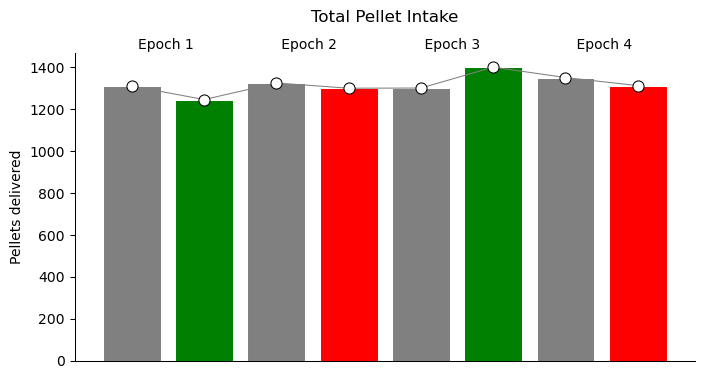

In [31]:
#I am trying to plot the data of each epoch ONLY for Experimental (PRNR group) 


EXP_Pellets = ff.loc[ff["order"] == 2]
CTL_Pellets= ff.loc[ff["order"] == 1]



EXP_Pellets_E1_NR = EXP_Pellets.loc[EXP_Pellets["epoch"] == "E1", ["n_pellets"]].mean()

CTL_Pellets_E1_NR = CTL_Pellets.loc[CTL_Pellets["epoch"] == "E1", ["n_pellets"]].mean()

EXP_Pellets_E2_PR = EXP_Pellets.loc[EXP_Pellets["epoch"] == "E2", ["n_pellets"]].mean()

CTL_Pellets_E2_NR = CTL_Pellets.loc[CTL_Pellets["epoch"] == "E2", ["n_pellets"]].mean()

EXP_Pellets_E3_NR = EXP_Pellets.loc[EXP_Pellets["epoch"] == "E3", ["n_pellets"]].mean()

CTL_Pellets_E3_NR = CTL_Pellets.loc[CTL_Pellets["epoch"] == "E3", ["n_pellets"]].mean()

EXP_Pellets_E4_PR = EXP_Pellets.loc[EXP_Pellets["epoch"] == "E4", ["n_pellets"]].mean()

CTL_Pellets_E4_NR = CTL_Pellets.loc[CTL_Pellets["epoch"] == "E4", ["n_pellets"]].mean()

# def Average (lst):
#     return sum(lst)/len(lst)


f, ax = plt.subplots(figsize= (8, 4))
_, _, barlist, _ = tp.barscatter([CTL_Pellets_E1_NR,EXP_Pellets_E1_NR,CTL_Pellets_E2_NR,EXP_Pellets_E2_PR,CTL_Pellets_E3_NR,EXP_Pellets_E3_NR,CTL_Pellets_E4_NR,EXP_Pellets_E4_PR], ax=ax, paired=True,linewuidth =1, groupwidth = 0.70,
barfacecolor_option="individual", baredgecolor= ["white"], barfacecolor=["grey","green","grey","red","grey","green","grey", "red"],
barlabels = ["NR Phase","PR Phase","NR Phase","PR Phase"] )
ax.set_title("Total Pellet Intake", pad= 5)






secax = ax.secondary_xaxis('top', color = "black" )
secax.set_xlabel( "Epoch 1                    Epoch 2                    Epoch 3                      Epoch 4", labelpad= -14.5)
secax.tick_params(axis='x', colors='white') 
secax.spines['top'].set_color('white')
ax.set_ylabel("Pellets delivered",fontsize = 10)


figfolder = r"C:\Users\hta031\OneDrive - UiT Office 365\Documents\People\Hamid\Presentations\2023\08_August\EBBS\EBBS_FIGS\\"
f.savefig(figfolder + "TOTAL_INTAKE_CTL_EXP.png")

# ax.axes.secondary_xaxis.set_ticklabels([])
# # secax.yticks([])
# plt.show()
# # secax.set_axis_off()
# for side in ['top','right','bottom','left']:
#     ax.spines[side].set_visible(True)
# secax.tick_params(axis='both',which='both',labelbottom=False,bottom=False,left=False)
# secax.set_yticks([min(y),max(y)]) 

C:\ProgramData\Anaconda3\lib\site-packages\trompy\barscatter.py:304: UserWarning: linewuidth is not a functional keyword argument. Check spelling or barscatter version.
  warnings.warn("{} is not a functional keyword argument. Check spelling or barscatter version.".format(key))


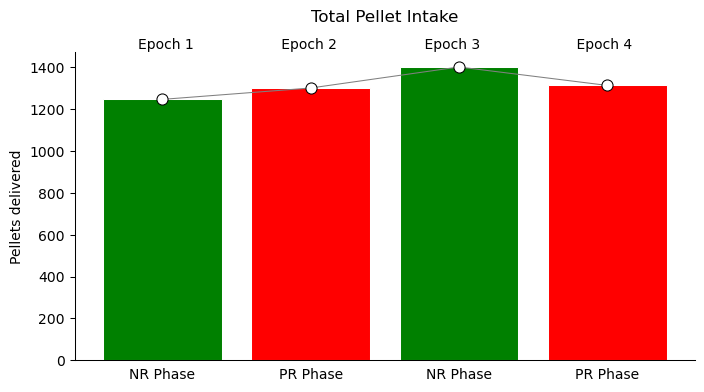

In [35]:
#I am trying to plot the data of each epoch ONLY for Experimental (PRNR group) 


EXP_Pellets = ff.loc[ff["order"] == 2]
# CTL_Pellets= ff.loc[ff["order"] == 1]



EXP_Pellets_E1_NR = EXP_Pellets.loc[EXP_Pellets["epoch"] == "E1", ["n_pellets"]].mean()

# CTL_Pellets_E1_NR = CTL_Pellets.loc[CTL_Pellets["epoch"] == "E1", ["n_pellets"]].mean()

EXP_Pellets_E2_PR = EXP_Pellets.loc[EXP_Pellets["epoch"] == "E2", ["n_pellets"]].mean()

# CTL_Pellets_E2_NR = CTL_Pellets.loc[CTL_Pellets["epoch"] == "E2", ["n_pellets"]].mean()

EXP_Pellets_E3_NR = EXP_Pellets.loc[EXP_Pellets["epoch"] == "E3", ["n_pellets"]].mean()

# CTL_Pellets_E3_NR = CTL_Pellets.loc[CTL_Pellets["epoch"] == "E3", ["n_pellets"]].mean()

EXP_Pellets_E4_PR = EXP_Pellets.loc[EXP_Pellets["epoch"] == "E4", ["n_pellets"]].mean()

# CTL_Pellets_E4_NR = CTL_Pellets.loc[CTL_Pellets["epoch"] == "E4", ["n_pellets"]].mean()

# def Average (lst):
#     return sum(lst)/len(lst)


f, ax = plt.subplots(figsize= (8, 4))
_, _, barlist, _ = tp.barscatter([EXP_Pellets_E1_NR,EXP_Pellets_E2_PR,EXP_Pellets_E3_NR,EXP_Pellets_E4_PR], ax=ax, paired=True,linewuidth =1, groupwidth = 0.70,
barfacecolor_option="individual", baredgecolor= ["white"], barfacecolor=["green","red","green","red"],
barlabels = ["NR Phase","PR Phase","NR Phase","PR Phase"] )
ax.set_title("Total Pellet Intake", pad= 5)






secax = ax.secondary_xaxis('top', color = "black" )
secax.set_xlabel( "Epoch 1                    Epoch 2                    Epoch 3                      Epoch 4", labelpad= -14.5)
secax.tick_params(axis='x', colors='white') 
secax.spines['top'].set_color('white')
ax.set_ylabel("Pellets delivered",fontsize = 10)


figfolder = r"C:\Users\hta031\OneDrive - UiT Office 365\Documents\People\Hamid\Presentations\2023\08_August\EBBS\EBBS_FIGS\\"
f.savefig(figfolder + "TOTAL_INTAKE_CTL_EXP.png")

# ax.axes.secondary_xaxis.set_ticklabels([])
# # secax.yticks([])
# plt.show()
# # secax.set_axis_off()
# for side in ['top','right','bottom','left']:
#     ax.spines[side].set_visible(True)
# secax.tick_params(axis='both',which='both',labelbottom=False,bottom=False,left=False)
# secax.set_yticks([min(y),max(y)]) 

C:\ProgramData\Anaconda3\lib\site-packages\trompy\barscatter.py:304: UserWarning: linewuidth is not a functional keyword argument. Check spelling or barscatter version.
  warnings.warn("{} is not a functional keyword argument. Check spelling or barscatter version.".format(key))


Text(0, 0.5, 'Pellets delivered')

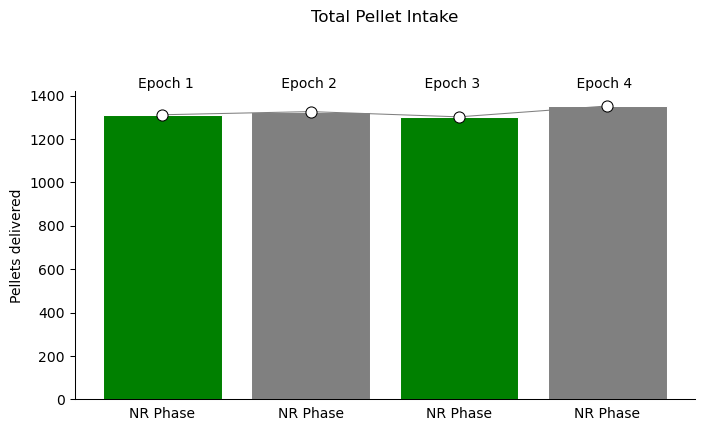

In [12]:
#This cell plots all pellet taken only by ctl mice in 4 epochs


# EXP_Pellets = ff.loc[ff["order"] == 2]
CTL_Pellets= ff.loc[ff["order"] == 1]



# EXP_Pellets_E1_NR = EXP_Pellets.loc[EXP_Pellets["epoch"] == "E1", ["n_pellets"]].mean()

CTL_Pellets_E1_NR = CTL_Pellets.loc[CTL_Pellets["epoch"] == "E1", ["n_pellets"]].mean()

# EXP_Pellets_E2_PR = EXP_Pellets.loc[EXP_Pellets["epoch"] == "E2", ["n_pellets"]].mean()

CTL_Pellets_E2_NR = CTL_Pellets.loc[CTL_Pellets["epoch"] == "E2", ["n_pellets"]].mean()

# EXP_Pellets_E3_NR = EXP_Pellets.loc[EXP_Pellets["epoch"] == "E3", ["n_pellets"]].mean()

CTL_Pellets_E3_NR = CTL_Pellets.loc[CTL_Pellets["epoch"] == "E3", ["n_pellets"]].mean()

# EXP_Pellets_E4_PR = EXP_Pellets.loc[EXP_Pellets["epoch"] == "E4", ["n_pellets"]].mean()

CTL_Pellets_E4_NR = CTL_Pellets.loc[CTL_Pellets["epoch"] == "E4", ["n_pellets"]].mean()

# def Average (lst):
#     return sum(lst)/len(lst)


f, ax = plt.subplots(figsize= (8, 4))
_, _, barlist, _ = tp.barscatter([CTL_Pellets_E1_NR,CTL_Pellets_E2_NR,CTL_Pellets_E3_NR,CTL_Pellets_E4_NR], ax=ax, paired=True,linewuidth =1, groupwidth = 0.70,
barfacecolor_option="individual", baredgecolor= ["white"], barfacecolor=["green", "grey","green", "grey"],
barlabels = ["NR Phase","NR Phase","NR Phase","NR Phase"] )
ax.set_title("Total Pellet Intake", pad= 50)






secax = ax.secondary_xaxis('top', color = "black" )
secax.set_xlabel( "Epoch 1                    Epoch 2                    Epoch 3                      Epoch 4", labelpad= -14.5)
secax.tick_params(axis='x', colors='white') 
secax.spines['top'].set_color('white')
ax.set_ylabel("Pellets delivered",fontsize = 10)

# ax.axes.secondary_xaxis.set_ticklabels([])
# # secax.yticks([])
# plt.show()
# # secax.set_axis_off()
# for side in ['top','right','bottom','left']:
#     ax.spines[side].set_visible(True)
# secax.tick_params(axis='both',which='both',labelbottom=False,bottom=False,left=False)
# secax.set_yticks([min(y),max(y)]) 

C:\ProgramData\Anaconda3\lib\site-packages\trompy\barscatter.py:304: UserWarning: linewuidth is not a functional keyword argument. Check spelling or barscatter version.
  warnings.warn("{} is not a functional keyword argument. Check spelling or barscatter version.".format(key))


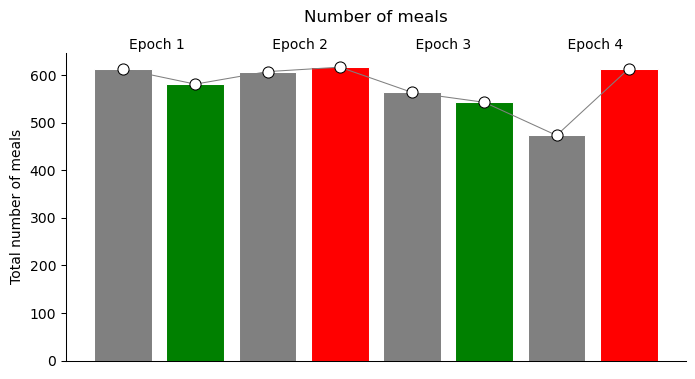

In [32]:
#this cell plots total number of meals of Protein restricted mice in 4 epochs NR, PR,NR,PR


EXP_Pellets = ff.loc[ff["order"] == 2]
CTL_Pellets= ff.loc[ff["order"] == 1]



EXP_Pellets_E1_NR = EXP_Pellets.loc[EXP_Pellets["epoch"] == "E1", ["n_meals"]].mean()

CTL_Pellets_E1_NR = CTL_Pellets.loc[CTL_Pellets["epoch"] == "E1", ["n_meals"]].mean()

EXP_Pellets_E2_PR = EXP_Pellets.loc[EXP_Pellets["epoch"] == "E2", ["n_meals"]].mean()

CTL_Pellets_E2_NR = CTL_Pellets.loc[CTL_Pellets["epoch"] == "E2", ["n_meals"]].mean()

EXP_Pellets_E3_NR = EXP_Pellets.loc[EXP_Pellets["epoch"] == "E3", ["n_meals"]].mean()

CTL_Pellets_E3_NR = CTL_Pellets.loc[CTL_Pellets["epoch"] == "E3", ["n_meals"]].mean()

EXP_Pellets_E4_PR = EXP_Pellets.loc[EXP_Pellets["epoch"] == "E4", ["n_meals"]].mean()

CTL_Pellets_E4_NR = CTL_Pellets.loc[CTL_Pellets["epoch"] == "E4", ["n_meals"]].mean()

# def Average (lst):
#     return sum(lst)/len(lst)


f, ax = plt.subplots(figsize= (8, 4))
_, _, barlist, _ = tp.barscatter([CTL_Pellets_E1_NR,EXP_Pellets_E1_NR,CTL_Pellets_E2_NR,EXP_Pellets_E2_PR,CTL_Pellets_E3_NR,EXP_Pellets_E3_NR,CTL_Pellets_E4_NR,EXP_Pellets_E4_PR], ax=ax, paired=True,linewuidth =1, groupwidth = 0.70,
barfacecolor_option="individual", baredgecolor= ["white"], barfacecolor=["grey","green","grey","red","grey","green","grey", "red"],
barlabels = ["NR Phase","PR Phase","NR Phase","PR Phase"] )
ax.set_title("Number of meals", pad= 5)






secax = ax.secondary_xaxis('top', color = "black" )
secax.set_xlabel( "Epoch 1                    Epoch 2                    Epoch 3                      Epoch 4", labelpad= -14.5)
secax.tick_params(axis='x', colors='white') 
secax.spines['top'].set_color('white')
ax.set_ylabel("Total number of meals",fontsize = 10)

figfolder = r"C:\Users\hta031\OneDrive - UiT Office 365\Documents\People\Hamid\Presentations\2023\08_August\EBBS\EBBS_FIGS\\"
f.savefig(figfolder + "NUMBER_MEALS_CTL_EXP.png")
# ax.axes.secondary_xaxis.set_ticklabels([])
# # secax.yticks([])
# plt.show()
# # secax.set_axis_off()
# for side in ['top','right','bottom','left']:
#     ax.spines[side].set_visible(True)
# secax.tick_params(axis='both',which='both',labelbottom=False,bottom=False,left=False)
# secax.set_yticks([min(y),max(y)]) 

C:\ProgramData\Anaconda3\lib\site-packages\trompy\barscatter.py:304: UserWarning: linewuidth is not a functional keyword argument. Check spelling or barscatter version.
  warnings.warn("{} is not a functional keyword argument. Check spelling or barscatter version.".format(key))


Text(0, 0.5, 'Total number of meals')

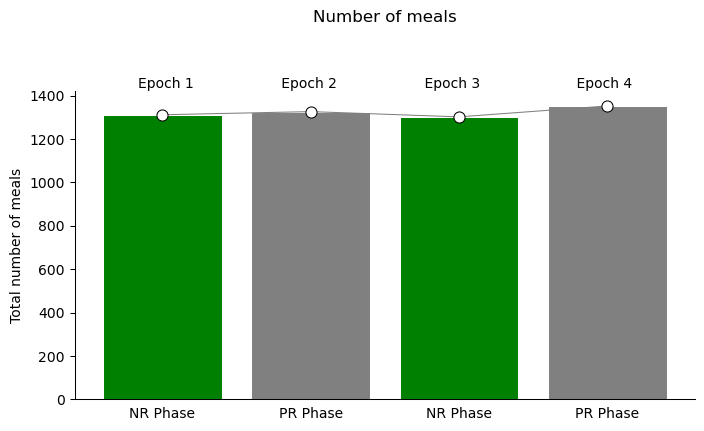

In [14]:
#this cell plots total number of meals of CTL mice


# EXP_Pellets = ff.loc[ff["order"] == 2]
CTL_Pellets= ff.loc[ff["order"] == 1]



# EXP_Pellets_E1_NR = EXP_Pellets.loc[EXP_Pellets["epoch"] == "E1", ["n_meals"]].mean()

CTL_Pellets_E1_NR = CTL_Pellets.loc[CTL_Pellets["epoch"] == "E1", ["n_pellets"]].mean()

# EXP_Pellets_E2_PR = EXP_Pellets.loc[EXP_Pellets["epoch"] == "E2", ["n_meals"]].mean()

CTL_Pellets_E2_NR = CTL_Pellets.loc[CTL_Pellets["epoch"] == "E2", ["n_pellets"]].mean()

# EXP_Pellets_E3_NR = EXP_Pellets.loc[EXP_Pellets["epoch"] == "E3", ["n_meals"]].mean()

CTL_Pellets_E3_NR = CTL_Pellets.loc[CTL_Pellets["epoch"] == "E3", ["n_pellets"]].mean()

# EXP_Pellets_E4_PR = EXP_Pellets.loc[EXP_Pellets["epoch"] == "E4", ["n_meals"]].mean()

CTL_Pellets_E4_NR = CTL_Pellets.loc[CTL_Pellets["epoch"] == "E4", ["n_pellets"]].mean()

# def Average (lst):
#     return sum(lst)/len(lst)


f, ax = plt.subplots(figsize= (8, 4))
_, _, barlist, _ = tp.barscatter([CTL_Pellets_E1_NR,CTL_Pellets_E2_NR,CTL_Pellets_E3_NR,CTL_Pellets_E4_NR], ax=ax, paired=True,linewuidth =1, groupwidth = 0.70,
barfacecolor_option="individual", baredgecolor= ["white"], barfacecolor=["green", "GREY","green", "GREY"],
barlabels = ["NR Phase","PR Phase","NR Phase","PR Phase"] )
ax.set_title("Number of meals", pad= 50)






secax = ax.secondary_xaxis('top', color = "black" )
secax.set_xlabel( "Epoch 1                    Epoch 2                    Epoch 3                      Epoch 4", labelpad= -14.5)
secax.tick_params(axis='x', colors='white') 
secax.spines['top'].set_color('white')
ax.set_ylabel("Total number of meals",fontsize = 10)

# ax.axes.secondary_xaxis.set_ticklabels([])
# # secax.yticks([])
# plt.show()
# # secax.set_axis_off()
# for side in ['top','right','bottom','left']:
#     ax.spines[side].set_visible(True)
# secax.tick_params(axis='both',which='both',labelbottom=False,bottom=False,left=False)
# secax.set_yticks([min(y),max(y)]) 

C:\ProgramData\Anaconda3\lib\site-packages\trompy\barscatter.py:304: UserWarning: linewuidth is not a functional keyword argument. Check spelling or barscatter version.
  warnings.warn("{} is not a functional keyword argument. Check spelling or barscatter version.".format(key))


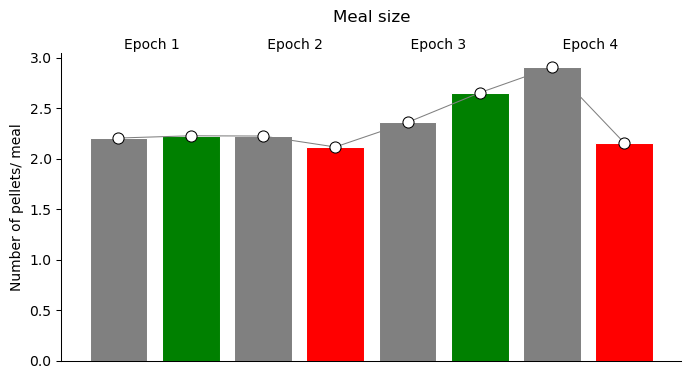

In [33]:
#this cell plots meal size of only Protein restricted mice in 4 epochs NR, PR,NR,PR


EXP_Pellets = ff.loc[ff["order"] == 2]
CTL_Pellets= ff.loc[ff["order"] == 1]



EXP_Pellets_E1_NR = EXP_Pellets.loc[EXP_Pellets["epoch"] == "E1", ["meal_size"]].mean()

CTL_Pellets_E1_NR = CTL_Pellets.loc[CTL_Pellets["epoch"] == "E1", ["meal_size"]].mean()

EXP_Pellets_E2_PR = EXP_Pellets.loc[EXP_Pellets["epoch"] == "E2", ["meal_size"]].mean()

CTL_Pellets_E2_NR = CTL_Pellets.loc[CTL_Pellets["epoch"] == "E2", ["meal_size"]].mean()

EXP_Pellets_E3_NR = EXP_Pellets.loc[EXP_Pellets["epoch"] == "E3", ["meal_size"]].mean()

CTL_Pellets_E3_NR = CTL_Pellets.loc[CTL_Pellets["epoch"] == "E3", ["meal_size"]].mean()

EXP_Pellets_E4_PR = EXP_Pellets.loc[EXP_Pellets["epoch"] == "E4", ["meal_size"]].mean()

CTL_Pellets_E4_NR = CTL_Pellets.loc[CTL_Pellets["epoch"] == "E4", ["meal_size"]].mean()

# def Average (lst):
#     return sum(lst)/len(lst)


f, ax = plt.subplots(figsize= (8, 4))
_, _, barlist, _ = tp.barscatter([CTL_Pellets_E1_NR,EXP_Pellets_E1_NR,CTL_Pellets_E2_NR,EXP_Pellets_E2_PR,CTL_Pellets_E3_NR, EXP_Pellets_E3_NR,CTL_Pellets_E4_NR, EXP_Pellets_E4_PR], ax=ax, paired=True,linewuidth =1, groupwidth = 0.70,
barfacecolor_option="individual", baredgecolor= ["white"], barfacecolor=["grey","green","grey","red","grey","green","grey", "red"],
barlabels = ["NR Phase","PR Phase","NR Phase","PR Phase"] )
ax.set_title("Meal size", pad= 5)






secax = ax.secondary_xaxis('top', color = "black" )
secax.set_xlabel( "Epoch 1                    Epoch 2                    Epoch 3                      Epoch 4", labelpad= -14.5)
secax.tick_params(axis='x', colors='white') 
secax.spines['top'].set_color('white')
ax.set_ylabel("Number of pellets/ meal",fontsize = 10)



figfolder = r"C:\Users\hta031\OneDrive - UiT Office 365\Documents\People\Hamid\Presentations\2023\08_August\EBBS\EBBS_FIGS\\"
f.savefig(figfolder + "MEAL_SIZE_CTL_EXP.png")


# ax.axes.secondary_xaxis.set_ticklabels([])
# # secax.yticks([])
# plt.show()
# # secax.set_axis_off()
# for side in ['top','right','bottom','left']:
#     ax.spines[side].set_visible(True)
# secax.tick_params(axis='both',which='both',labelbottom=False,bottom=False,left=False)
# secax.set_yticks([min(y),max(y)]) 

C:\ProgramData\Anaconda3\lib\site-packages\trompy\barscatter.py:304: UserWarning: linewuidth is not a functional keyword argument. Check spelling or barscatter version.
  warnings.warn("{} is not a functional keyword argument. Check spelling or barscatter version.".format(key))


Text(0, 0.5, 'Number of pellets/ meal')

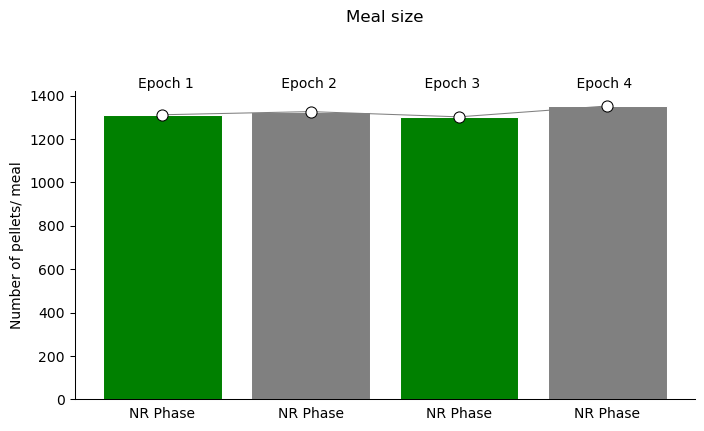

In [16]:
#this cell plots meal size of only ctl mice in 4 epochs 


# EXP_Pellets = ff.loc[ff["order"] == 2]
CTL_Pellets= ff.loc[ff["order"] == 1]



# EXP_Pellets_E1_NR = EXP_Pellets.loc[EXP_Pellets["epoch"] == "E1", ["meal_size"]].mean()

CTL_Pellets_E1_NR = CTL_Pellets.loc[CTL_Pellets["epoch"] == "E1", ["n_pellets"]].mean()

# EXP_Pellets_E2_PR = EXP_Pellets.loc[EXP_Pellets["epoch"] == "E2", ["meal_size"]].mean()

CTL_Pellets_E2_NR = CTL_Pellets.loc[CTL_Pellets["epoch"] == "E2", ["n_pellets"]].mean()

# EXP_Pellets_E3_NR = EXP_Pellets.loc[EXP_Pellets["epoch"] == "E3", ["meal_size"]].mean()

CTL_Pellets_E3_NR = CTL_Pellets.loc[CTL_Pellets["epoch"] == "E3", ["n_pellets"]].mean()

# EXP_Pellets_E4_PR = EXP_Pellets.loc[EXP_Pellets["epoch"] == "E4", ["meal_size"]].mean()

CTL_Pellets_E4_NR = CTL_Pellets.loc[CTL_Pellets["epoch"] == "E4", ["n_pellets"]].mean()

# def Average (lst):
#     return sum(lst)/len(lst)


f, ax = plt.subplots(figsize= (8, 4))
_, _, barlist, _ = tp.barscatter([CTL_Pellets_E1_NR,CTL_Pellets_E2_NR,CTL_Pellets_E3_NR,CTL_Pellets_E4_NR], ax=ax, paired=True,linewuidth =1, groupwidth = 0.70,
barfacecolor_option="individual", baredgecolor= ["white"], barfacecolor=["green", "grey","green", "grey"],
barlabels = ["NR Phase","NR Phase","NR Phase","NR Phase"] )
ax.set_title("Meal size", pad= 50)






secax = ax.secondary_xaxis('top', color = "black" )
secax.set_xlabel( "Epoch 1                    Epoch 2                    Epoch 3                      Epoch 4", labelpad= -14.5)
secax.tick_params(axis='x', colors='white') 
secax.spines['top'].set_color('white')
ax.set_ylabel("Number of pellets/ meal",fontsize = 10)

# ax.axes.secondary_xaxis.set_ticklabels([])
# # secax.yticks([])
# plt.show()
# # secax.set_axis_off()
# for side in ['top','right','bottom','left']:
#     ax.spines[side].set_visible(True)
# secax.tick_params(axis='both',which='both',labelbottom=False,bottom=False,left=False)
# secax.set_yticks([min(y),max(y)]) 

C:\ProgramData\Anaconda3\lib\site-packages\trompy\barscatter.py:304: UserWarning: linewuidth is not a functional keyword argument. Check spelling or barscatter version.
  warnings.warn("{} is not a functional keyword argument. Check spelling or barscatter version.".format(key))


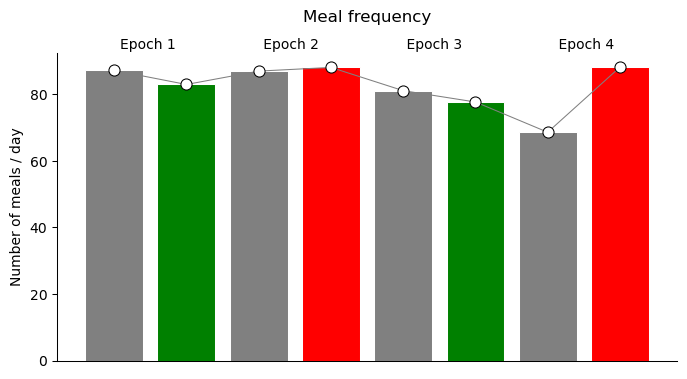

In [34]:
#this cell plots meal frequency of only Protein restricted mice in 4 epochs NR, PR,NR,PR


EXP_Pellets = ff.loc[ff["order"] == 2]
CTL_Pellets= ff.loc[ff["order"] == 1]



EXP_Pellets_E1_NR = EXP_Pellets.loc[EXP_Pellets["epoch"] == "E1", ["meal_freq"]].mean()

CTL_Pellets_E1_NR = CTL_Pellets.loc[CTL_Pellets["epoch"] == "E1", ["meal_freq"]].mean()

EXP_Pellets_E2_PR = EXP_Pellets.loc[EXP_Pellets["epoch"] == "E2", ["meal_freq"]].mean()

CTL_Pellets_E2_NR = CTL_Pellets.loc[CTL_Pellets["epoch"] == "E2", ["meal_freq"]].mean()

EXP_Pellets_E3_NR = EXP_Pellets.loc[EXP_Pellets["epoch"] == "E3", ["meal_freq"]].mean()

CTL_Pellets_E3_NR = CTL_Pellets.loc[CTL_Pellets["epoch"] == "E3", ["meal_freq"]].mean()

EXP_Pellets_E4_PR = EXP_Pellets.loc[EXP_Pellets["epoch"] == "E4", ["meal_freq"]].mean()

CTL_Pellets_E4_NR = CTL_Pellets.loc[CTL_Pellets["epoch"] == "E4", ["meal_freq"]].mean()

# def Average (lst):
#     return sum(lst)/len(lst)


f, ax = plt.subplots(figsize= (8, 4))
_, _, barlist, _ = tp.barscatter([CTL_Pellets_E1_NR, EXP_Pellets_E1_NR,CTL_Pellets_E2_NR,EXP_Pellets_E2_PR,CTL_Pellets_E3_NR ,EXP_Pellets_E3_NR,CTL_Pellets_E4_NR,EXP_Pellets_E4_PR], ax=ax, paired=True,linewuidth =1, groupwidth = 0.70,
barfacecolor_option="individual", baredgecolor= ["white"], barfacecolor=["grey","green","grey","red","grey","green","grey", "red"],
barlabels = ["NR Phase","PR Phase","NR Phase","PR Phase"] )
ax.set_title("Meal frequency", pad= 5)






secax = ax.secondary_xaxis('top', color = "black" )
secax.set_xlabel( "Epoch 1                    Epoch 2                    Epoch 3                      Epoch 4", labelpad= -14.5)
secax.tick_params(axis='x', colors='white') 
secax.spines['top'].set_color('white')
ax.set_ylabel("Number of meals / day",fontsize = 10)




figfolder = r"C:\Users\hta031\OneDrive - UiT Office 365\Documents\People\Hamid\Presentations\2023\08_August\EBBS\EBBS_FIGS\\"
f.savefig(figfolder + "MEAL_FRQ_CTL_EXP.png")
# ax.axes.secondary_xaxis.set_ticklabels([])
# # secax.yticks([])
# plt.show()
# # secax.set_axis_off()
# for side in ['top','right','bottom','left']:
#     ax.spines[side].set_visible(True)
# secax.tick_params(axis='both',which='both',labelbottom=False,bottom=False,left=False)
# secax.set_yticks([min(y),max(y)]) 

C:\ProgramData\Anaconda3\lib\site-packages\trompy\barscatter.py:304: UserWarning: linewuidth is not a functional keyword argument. Check spelling or barscatter version.
  warnings.warn("{} is not a functional keyword argument. Check spelling or barscatter version.".format(key))


Text(0, 0.5, 'Number of meals / day')

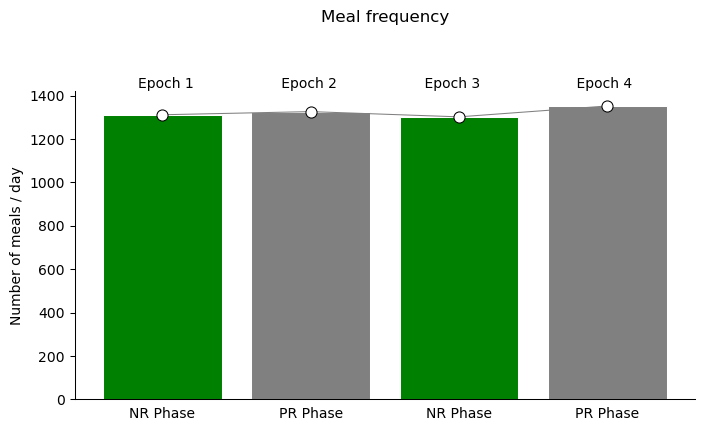

In [18]:
#this cell plots meal frequency of only ctl mice in 4 epochs


# EXP_Pellets = ff.loc[ff["order"] == 2]
CTL_Pellets= ff.loc[ff["order"] == 1]



# EXP_Pellets_E1_NR = EXP_Pellets.loc[EXP_Pellets["epoch"] == "E1", ["meal_freq"]].mean()

CTL_Pellets_E1_NR = CTL_Pellets.loc[CTL_Pellets["epoch"] == "E1", ["n_pellets"]].mean()

# EXP_Pellets_E2_PR = EXP_Pellets.loc[EXP_Pellets["epoch"] == "E2", ["meal_freq"]].mean()

CTL_Pellets_E2_NR = CTL_Pellets.loc[CTL_Pellets["epoch"] == "E2", ["n_pellets"]].mean()

# EXP_Pellets_E3_NR = EXP_Pellets.loc[EXP_Pellets["epoch"] == "E3", ["meal_freq"]].mean()

CTL_Pellets_E3_NR = CTL_Pellets.loc[CTL_Pellets["epoch"] == "E3", ["n_pellets"]].mean()

# EXP_Pellets_E4_PR = EXP_Pellets.loc[EXP_Pellets["epoch"] == "E4", ["meal_freq"]].mean()

CTL_Pellets_E4_NR = CTL_Pellets.loc[CTL_Pellets["epoch"] == "E4", ["n_pellets"]].mean()

# def Average (lst):
#     return sum(lst)/len(lst)


f, ax = plt.subplots(figsize= (8, 4))
_, _, barlist, _ = tp.barscatter([CTL_Pellets_E1_NR,CTL_Pellets_E2_NR,CTL_Pellets_E3_NR,CTL_Pellets_E4_NR], ax=ax, paired=True,linewuidth =1, groupwidth = 0.70,
barfacecolor_option="individual", baredgecolor= ["white"], barfacecolor=["green", "GREY","green", "GREY"],
barlabels = ["NR Phase","PR Phase","NR Phase","PR Phase"] )
ax.set_title("Meal frequency", pad= 50)






secax = ax.secondary_xaxis('top', color = "black" )
secax.set_xlabel( "Epoch 1                    Epoch 2                    Epoch 3                      Epoch 4", labelpad= -14.5)
secax.tick_params(axis='x', colors='white') 
secax.spines['top'].set_color('white')
ax.set_ylabel("Number of meals / day",fontsize = 10)

# ax.axes.secondary_xaxis.set_ticklabels([])
# # secax.yticks([])
# plt.show()
# # secax.set_axis_off()
# for side in ['top','right','bottom','left']:
#     ax.spines[side].set_visible(True)
# secax.tick_params(axis='both',which='both',labelbottom=False,bottom=False,left=False)
# secax.set_yticks([min(y),max(y)]) 

In [114]:
# get all IPIs for distribution histogram

all_ipis = []
for key, data in ff_dict.items():
#     print(key, len(data["pellets"]))
    all_ipis.append(data["pellets"].dropna().clip(1))
    
all_ipis = pd.concat(all_ipis)


# get all IPIs for distribution histogram

ipis_ALL = []
NR_IPIS = []
PR_IPIS = []
for key, data in ff_dict.items():
    
    if data ["epoch"] == "E2":
        if data ["diet"] == "NR":
            NR_IPIS.append(data["pellets"].dropna().clip(1))
        elif  data ["diet"] == "PR":
            PR_IPIS.append(data["pellets"].dropna().clip(1))
    

NR_IPIS = pd.concat(NR_IPIS)
PR_IPIS = pd.concat(PR_IPIS)
ipis_ALL= pd.concat([PR_IPIS, NR_IPIS] )

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


15747

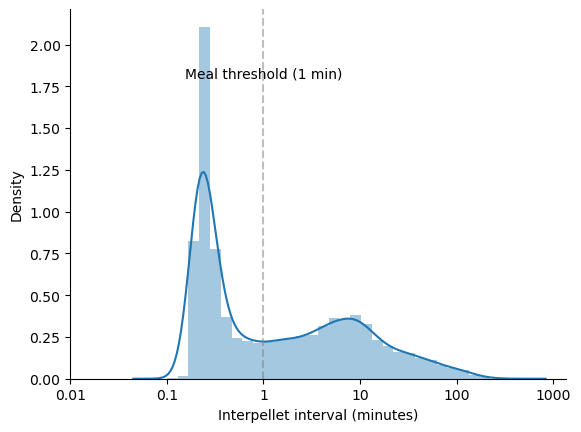

In [115]:
trans_ipis_ALL = [ipi for ipi in np.log10(ipis_ALL/60) if np.isfinite(ipi)]

f, ax = plt.subplots()
data = sns.distplot(trans_ipis_ALL)
ax.set_xlabel("Interpellet interval (minutes)")
ax.set_xticks([-2, -1, 0, 1, 2, 3], labels=["0.01", "0.1", "1", "10", "100", "1000"])

ax.axvline(0, linestyle="--", color="grey", alpha=0.5)
ax.text(0,1.8, "Meal threshold (1 min)", ha="center")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

#f.savefig("..\\results\\ipi_ff.png")
len(trans_ipis_ALL)

In [271]:
ff_dict["FEDXC01_E1"]

{'mouse': 'FEDXC01',
 'diet': 'NR',
 'sex': 'M',
 'epoch': 'E1',
 'order': 2,
 'pellets': t
 2022-09-12 09:42:52    14681.0
 2022-09-12 09:43:05       13.0
 2022-09-12 09:46:28      203.0
 2022-09-12 09:54:14      466.0
 2022-09-12 10:01:55      461.0
 2022-09-12 10:02:12       17.0
 2022-09-12 10:02:26       14.0
 2022-09-12 10:18:36      970.0
 2022-09-12 10:23:01      265.0
 2022-09-12 10:23:22       21.0
 2022-09-12 10:34:16      654.0
 2022-09-12 10:43:37      561.0
 2022-09-12 10:53:54      617.0
 2022-09-12 12:33:24     5970.0
 2022-09-12 12:33:43       19.0
 2022-09-12 12:34:52       69.0
 2022-09-12 12:38:52      240.0
 2022-09-12 12:39:07       15.0
 2022-09-12 12:51:24      737.0
 2022-09-12 12:51:38       14.0
 2022-09-12 12:51:53       15.0
 2022-09-12 15:04:35     7962.0
 2022-09-12 15:04:49       14.0
 2022-09-12 15:05:02       13.0
 2022-09-12 16:53:05     6483.0
 2022-09-12 16:53:19       13.0
 2022-09-12 16:53:31       13.0
 2022-09-12 16:53:50       19.0
 2022-09-12 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


8105

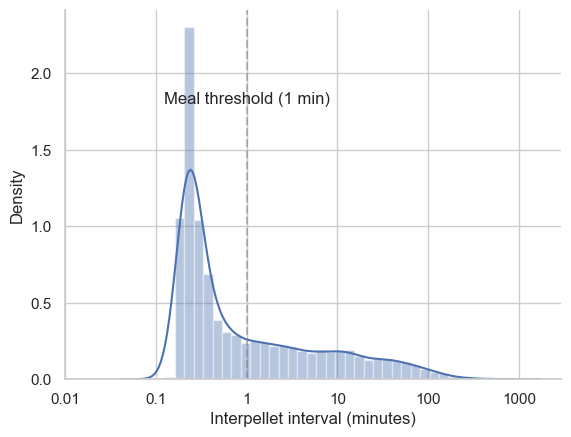

In [299]:
trans_ipisNR = [ipi for ipi in np.log10(NR_IPIS/60) if np.isfinite(ipi)]

f, ax = plt.subplots()
data = sns.distplot(trans_ipisNR)
ax.set_xlabel("Interpellet interval (minutes)")
ax.set_xticks([-2, -1, 0, 1, 2, 3], labels=["0.01", "0.1", "1", "10", "100", "1000"])

ax.axvline(0, linestyle="--", color="grey", alpha=0.5)
ax.text(0,1.8, "Meal threshold (1 min)", ha="center")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

#f.savefig("..\\results\\ipi_ff.png")

len(trans_ipisNR)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


7798

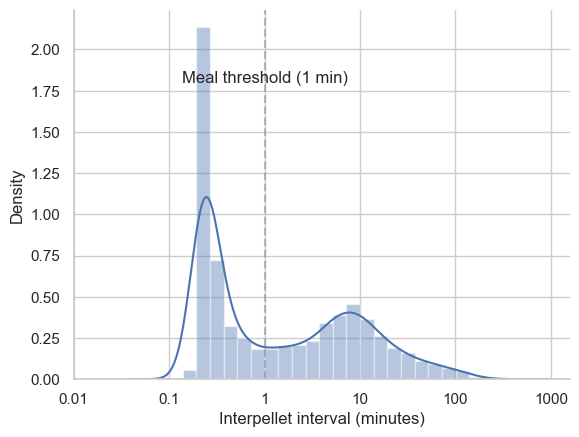

In [305]:
trans_ipisPR = [ipi for ipi in np.log10(PR_IPIS/60) if np.isfinite(ipi)]

f, ax = plt.subplots()
data = sns.distplot(trans_ipisPR)
ax.set_xlabel("Interpellet interval (minutes)")
ax.set_xticks([-2, -1, 0, 1, 2, 3], labels=["0.01", "0.1", "1", "10", "100", "1000"])


ax.axvline(0, linestyle="--", color="grey", alpha=0.5)
ax.text(0,1.8, "Meal threshold (1 min)", ha="center")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

#f.savefig("..\\results\\ipi_ff.png")
len(trans_ipisPR)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

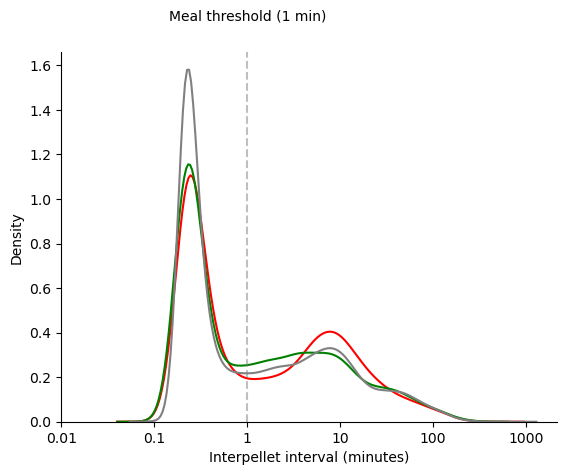

In [116]:
#converge PR and NR KDE
trans_ipisPR = [ipi for ipi in np.log10(PR_IPIS/60) if np.isfinite(ipi)]
trans_ipisNR = [ipi for ipi in np.log10(NR_IPIS/60) if np.isfinite(ipi)]
trans_ipisALL = [ipi for ipi in np.log10(all_ipis/60) if np.isfinite(ipi)]
f, ax = plt.subplots()
data = sns.distplot(trans_ipisPR, color= "red", hist = False, kde=True )
ax.set_xlabel("Interpellet interval (minutes)")
ax.set_xticks([-2, -1, 0, 1, 2, 3], labels=["0.01", "0.1", "1", "10", "100", "1000"])

data = sns.distplot(trans_ipisNR, color = "green", hist = False )
ax.set_xlabel("Interpellet interval (minutes)")
ax.set_xticks([-2, -1, 0, 1, 2, 3], labels=["0.01", "0.1", "1", "10", "100", "1000"])

data = sns.distplot(trans_ipisALL, color = "grey", hist = False , kde = True)
ax.set_xlabel("Interpellet interval (minutes)")
ax.set_xticks([-2, -1, 0, 1, 2, 3], labels=["0.01", "0.1", "1", "10", "100", "1000"])


ax.axvline(0, linestyle="--", color="grey", alpha=0.5)
ax.text(0,1.8, "Meal threshold (1 min)", ha="center")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

#f.savefig("..\\results\\ipi_ff.png")



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


['grey']
Cannot flatten list. Maybe is in the wrong format. Returning empty list.
['grey']
Cannot flatten list. Maybe is in the wrong format. Returning empty list.


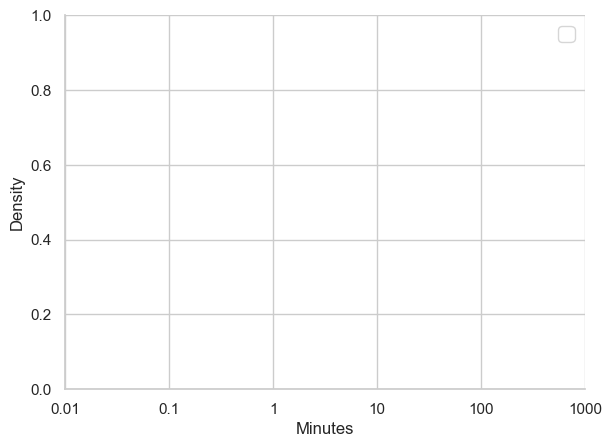

In [307]:
def EPOCH(data, ax=[], colors=[], fill=False, labels=[], linestyle="-", **kwargs):
    if ax == []:
        f, ax = plt.subplots()

    if len(colors) != len(data):
        colors = ["grey"] * len(data)
    print(colors)

    if len(labels) != len(data):
        labels = [str(n) for n in range(len(data))]

    for idx, group in enumerate(data):

        y = tp.flatten_list(group)
        y = [np.log10(val*60) for val in y if val > 0]
            
        sns.kdeplot(y, ax=ax,
                    color=colors[idx],
                    fill=fill,
                    label=labels[idx],
                    linestyle=linestyle)

    ax.set_ylabel('Density',fontsize = 12)
    ax.set_xlabel('Minutes',fontsize = 12)

    ax.set_xticks(range(-2,4))
    ax.set_xticklabels([10**num for num in range(-2,4)])

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)


f, ax = plt.subplots(figsize = (8,5.5), gridspec_kw= {"left":0.25,"bottom": 0.2})

EPOCH([trans_ipisPR],
       colors=["green", "red"],
       labels=["NRPR - NR pellets"],
       linestyle="-",
       fill=True,
       ax=ax)

EPOCH([trans_ipisPR],
       colors=["xkcd:kelly green", "pink"],
       labels=["PRNR - PR pellets"],
       linestyle="--",
       fill=True,
       ax=ax)
                           

ax.legend(fontsize = 15)

In [30]:
plt.subplots??

Signature:
plt.subplots(
    nrows=1,
    ncols=1,
    *,
    sharex=False,
    sharey=False,
    squeeze=True,
    subplot_kw=None,
    gridspec_kw=None,
    **fig_kw,
)
Source:   
def subplots(nrows=1, ncols=1, *, sharex=False, sharey=False, squeeze=True,
             subplot_kw=None, gridspec_kw=None, **fig_kw):
    """
    Create a figure and a set of subplots.

    This utility wrapper makes it convenient to create common layouts of
    subplots, including the enclosing figure object, in a single call.

    Parameters
    ----------
    nrows, ncols : int, default: 1
        Number of rows/columns of the subplot grid.

    sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
        Controls sharing of properties among x (*sharex*) or y (*sharey*)
        axes:

        - True or 'all': x- or y-axis will be shared among all subplots.
        - False or 'none': each subplot x- or y-axis will be independent.
        - 'row': each subplot row will share an x- or y-a

NameError: name 'interpellet_interval_plot' is not defined

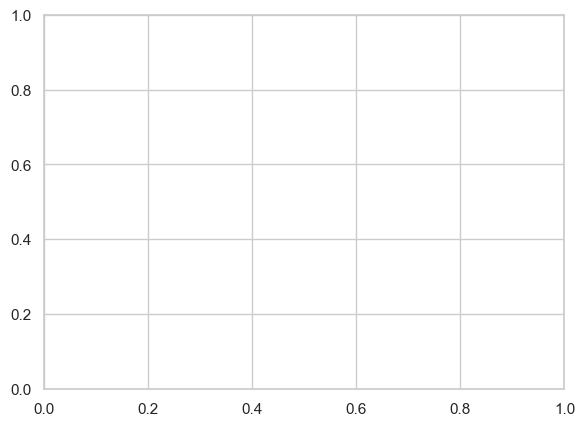

In [308]:
f, ax = plt.subplots(figsize = (8,5.5), gridspec_kw= {"left":0.25,"bottom": 0.2})

interpellet_interval_plot([IPIs_m_nrpr_nr, IPIs_m_nrpr_pr],
                           colors=["green", "red"],
                           labels=["NRPR - NR pellets", "NRPR - PR pellets"],
                           linestyle="-",
                           fill=True,
                           ax=ax)

interpellet_interval_plot([IPIs_m_prnr_nr, IPIs_m_prnr_pr],
                           colors=["xkcd:kelly green", "pink"],
                           labels=["PRNR - NR pellets", "PRNR - PR pellets"],
                           linestyle="--",
                           fill=True,
                           ax=ax)

ax.legend(fontsize = 15)

#f.savefig(figfolder + "interpelletintervalmale.pdf")


# figfolder = r"C:\Users\hta031\OneDrive - UiT Office 365\Documents\People\Hamid\Educational Component\Midway_Evaluation\MIDWAY_PRESENTATION\FIGS\\"
# f.savefig(figfolder + "Kernel_all_groups.tif")

In [309]:
xls = pd.ExcelFile(r"C:\Users\hta031\Github\FEDPROTEINPRO\METAFILE FEDXC DATA SHEETS.xls")
dfmeta= pd.read_excel(xls,"METAFILE")


In [310]:
dfmeta

,fedfile,mouse,diet,mode,sex,order,epoch
0,FED001_091022_00.CSV,FEDXC01,NR,FF,M,2,E1
1,FED001_091922_00_MERGED.CSV,FEDXC01,PR,FF,M,2,E2
2,FED001_092622_00.CSV,FEDXC01,NR,FF,M,2,E3
3,FED001_100322_00.CSV,FEDXC01,PR,FF,M,2,E4
4,FED002_091022_00.CSV,FEDXC02,NR,FF,M,2,E1
5,FED002_091922_00.CSV,FEDXC02,PR,FF,M,2,E2
6,FED002_092622_00.CSV,FEDXC02,NR,FF,M,2,E3
7,FED002_100322_00.CSV,FEDXC02,PR,FF,M,2,E4
8,FED003_091022_00.CSV,FEDXC03,NR,FF,M,2,E1
9,FED003_091922_00.CSV,FEDXC03,PR,FF,M,2,E2
